# **DATA SCIENCE PROJECT: Hotel Booking Cancellations**

 **Curso Data Science - Coderhouse 2022-2023**

 **Autor: Evelyn Delacoste**

El dataset analizado contiene información sobre las reservas de un City Hotel y Resort Hotel entre las fechas Julio 2015 a Agosto 2017, localizado en Portugal.

Cada registro contiene datos sobre la solicitud realizada en la reserva y si efectivamente se concretó o fue cancelada.

Fuente: https://www.kaggle.com/datasets/mojtaba142/hotel-booking

# **Introducción**
**El lineamiento principal del proyecto es identificar cuáles son los condicionantes que influyen a que una reserva no se haga efectiva.** **El análisis es útil para impulsar estrategias de negocios que mejoren en rendimiento del Hotel.**

Los registros diponibles contienen reservas de dos tipos de hotel de la misma cadena:
* Hotel Resort: Es un hotel que provee instalaciones variadas apuntadas al entretenimiento, un estilo de hotel all-inclusive.
* City Hotel: es un hotel clásico con alojamiento y bufet para comidas como desayuno o cena.

El registro de las reservas es por un período de tiempo de aproximadamente 2 años (jul2015-Ago2017)

Previo a analizar los datos disponibles, surgen los siguientes cuestionamientos:

* ¿Cuál es el hotel más demandado?
* ¿Cuál es la duración de la estadia promedio?
* ¿Qué características poseen los clientes de cada hotel? ¿Nacionalidad, Edades, Sexo? ¿Cómo se clasifican los grupos de clientes?
* ¿Cuál es la época del año más solicitada? ¿Existe un comportamiento diferente según el tipo de hotel?
* ¿Varia la tarifa según la demanda? ¿Y según los días de la semana?
* ¿Qué mes del año posee mayor número de cancelaciones? ¿Que duración poseen las estadias que se cancelan?

**Primero se verificará que clase de información hay disponible en el dataset para luego plantear las preguntas de negocio, las cuales serán la guía del proyecto.**

## **Contexto Analítico: Insights Intro**
Esta sección apunta a obtener una previsualización de la información disponible.

In [240]:
# importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'grid.linestyle': '-.'})

In [241]:
# direccion de la ubicación de la base de datos
url = "https://raw.githubusercontent.com/EvDelacost/Hotel-Bookings-Classification/79a9a06d792e1b8c1a49122931090162a38041ec/hotel_booking.csv"

In [242]:
# lectura del dataset
df = pd.read_csv(url)

In [243]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [244]:
# cantidad de filas y columnas
df.shape

(119390, 36)

In [245]:
# tipos de datos en cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [246]:
# verificación de la cantidad de nulos
df.isna().sum().sort_values(ascending = False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

In [247]:
# porcentaje de nulos en cada variable
(df.isna().sum().sort_values(ascending = False) / df.shape[0]) * 100

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
hotel                              0.000000
booking_changes                    0.000000
deposit_type                       0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
reserved_room_type                 0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
reservation_status_date            0.000000
name                               0.000000
email                              0.000000
phone-number                       0.000000
assigned_room_type                 0.000000
previous_bookings_not_canceled     0.000000
is_canceled                        0.000000
previous_cancellations             0.000000
is_repeated_guest               

**El dataset posee 119390 registros con 35 variables diferentes.**
**Existen variables con tipos de datos numéricos, de texto y fechas que se encuentran en formato numérico.**

**Hay 4 variables con valores nulos pero, exceptuando una de ellas, tienen un porcentaje muy bajo**.

In [248]:
# variables numéricas
num_col=[column for column in df.columns if (df[column].dtype=='int64') | (df[column].dtype=='float64')]
num_col

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [249]:
# variables categóricas
cat_col=[column for column in df.columns if (df[column].dtype=='object')]
cat_col

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date',
 'name',
 'email',
 'phone-number',
 'credit_card']

In [250]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [251]:
# valores unicos en variable "meal" ELIMINAR
df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [252]:
# valores unicos en variable "country" ELIMINAR
df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [253]:
# valores unicos en variable "market_segment" ELIMINAR
df["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [254]:
df["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [255]:
# valores unicos en variable "reserved_room_type"
df["reserved_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [256]:
# valores unicos en variable "deposit_type"
df["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [257]:
# valores unicos en variable "customer_type"
df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [258]:
# valores unicos en variable "reservation_status"
df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

**A continuación se describe el contenido de las variables clasificandolas en categóricas y numéricas**

**VARIABLES CATEGORICAS**
*   hotel: Indica si se trata de un Resort Hotel o City Hotel.
*   arrival_date_month: Indica el mes de arribo del cliente entre January - December.
*   meal: Indica el tipo de comida incluida en la reserva.
*   country: Indica el pais de origen del cliente.
*   market_segment: Indica la designación del segmento de mercado. En las categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".
*   distribution_channel: Indica canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos".
*   reserved_room_type: Indica mediante una codificación el tipo de habitación asignada en la reserva.
*   assigned_room_type: Indica mediante una codificación el tipo de habitación asignada en el arribo del cliente.
*   deposit_type: Indica el tipo de forma de pago.
*   customer_type: Indica el tipo de cliente Grupo – cuando la reserva está asociada a un grupo; Transitorio – cuando la reserva no es parte de un grupo o contrato, y no está asociada a otros.
*   reservation_status: Indica el estado de la reserva.
*   reservation_status_date: Indica Indica la fecha de actualización del estado de la reserva.
*   name: Nombre del cliente.
*   email: Dirección de correo del cliente.


**VARIABLES NUMÉRICAS**
*   is_cancelled: Indica con 1 reserva cancelada y con 0 reserva no cancelada.
*   lead_time: Indica el plazo de tiempo entre la ejecución de la reserva y el arribo del cliente al hotel.
*   arrival_date_year: Indica el año de arribo del cliente.
*   arrival_date_week_number: Indica el número de la semana dentro del mes de arribo del cliente.
*   stays_in_weekend_nights: Indica la cantidad de noches de fin de semana (saturday-sunday) que se hospedo el cliente.
*   stays_in_week_nights: Esta variable indica la cantidad de noches de semana (monday-friday) que se hospedo el cliente.
*   adults: Indica la cantidad de adultos por reserva.
*   children: Indica la cantidad de niños por reserva.
*   babies: Indica la cantidad de bebés por reserva.
*   is_repeated_guest: Indica con 1 si el cliente ya se hospedó en el hotel y con 0 si es nuevo cliente.
*   previous_cancellatios: Indica número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual.
*   previous_bookings_not_canceled: Indica número de reservas anteriores no canceladas por el cliente antes de la reserva actual.
*   booking_changes: Indica el número de cambios/modificaciones realizados en la reserva desde el momento en que se ingresó la reserva hasta el arribo del cliente.
*   agent: Indica el ID del agente de viajes que agendó la reserva.
*   company: Indica el ID de la compañía que agendó la reserva.
*   days_in_waiting_list: Indica el número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente.
*   adr: Indica el valor promedio de la tarifa.
*   required_car_parking_spaces: Indica el número de plazas de aparcamiento requeridas por el cliente.
*   total_of_special_requests: Indica el número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto).
*   phone-number: Número de telefono del cliente.
*   credit_card: Número de la tarjeta de crédito del cliente.

## **Preguntas de Negocio**
A partir de la definición de las variables, se plantean algunas cuestiones que formarán parte del **problema de negocio: RESERVAS CANCELADAS**.


1.   ¿Cual es el hotel más demandado y cuál de ellos posee mayor % de cancelaciones?
2.   ¿Cuáles son las épocas del año más demandas? ¿Qué sucede con las estadías?
3.   ¿Como se comporta el cliente con respecto al tiempo previo de arribo al hotel? ¿Tiene que ver con la Nacionalidad o Composición Familiar?
4.   ¿El Hotel tiene clientela fija? ¿Como se comportan aquellos clientes frecuentes?
5.   ¿Como gestiona el hotel las reservas?
6.   ¿Como son las tarifas de los hoteles?

# **Data Wrangling**
Esta sección apunta a realizar algunas tareas de limpieza de datos en base a lo detectado en el apartado Contexto Analítico.

##**Verificación de datos en variables**

In [259]:
#La variable "Hotel" no deberia contener más que 2 variables:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [260]:
#La variable "is_canceled" no deberia contener más que ceros y unos:
df["is_canceled"].unique()

array([0, 1])

In [261]:
#La variable "arrival_date_year" debería contener los años 2015,2016 y 2017 según la fuente de descarga del dataset:
df["arrival_date_year"].unique()

array([2015, 2016, 2017])

In [262]:
#La variable "arrival_date_month" debería contener los 12 años del mes:
df["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [263]:
#La suma de las estadías en la semana y en el fin de semana no debería ser cero
df.drop(df[df["stays_in_weekend_nights"] + df["stays_in_week_nights"]==0].index,inplace=True)

In [264]:
#se eliminaron 715 filas con estadías nulas
df.shape

(118675, 36)

In [265]:
#La suma de la cantidad de personas en la reserva no debería ser cero
df.drop(df[df["adults"] + df["children"]+df["babies"]==0].index,inplace=True)

In [266]:
#se eliminaron 110 filas con huespedes nulos
df.shape

(118565, 36)

## **Registros Duplicados & Valores Nulos**

In [267]:
#se verifica si hay registros duplicados
df.duplicated().value_counts()

False    118565
dtype: int64

In [268]:
#analisis de las variables con valores nulos
df.isna().sum().sort_values(ascending=False)

company                           111870
agent                              16079
country                              473
children                               4
hotel                                  0
booking_changes                        0
deposit_type                           0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
reserved_room_type                     0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
name                                   0
email                                  0
phone-number                           0
assigned_room_type                     0
previous_bookings_not_canceled         0
is_canceled                            0
previous_cancellations                 0
is_repeated_guest                      0
distribution_channel                   0
market_segment  

**Se identifican 4 variables con valores nulos:**
* company
* agent
* children
* country

**A continuación se analiza el contenido de cada una de ellas.**

**Variable company**

In [269]:
df["company"].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 274., 174., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371.,  86.,  82., 218.,
        88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,  51.,
       395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478., 112.,
       486., 421.,   9., 308., 135., 224., 504., 269., 356., 498., 390.,
       513., 203., 263., 477., 521., 169., 515., 445., 337., 251., 428.,
       292., 388., 130., 250., 355., 254., 543., 531., 528.,  62., 120.,
        42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61., 501., 165.,
       291., 290.,  43., 325., 192., 108., 200., 465., 287., 297., 490.,
       482., 207., 282., 437., 225., 329., 272.,  28.,  77., 338.,  72.,
       246., 319., 146., 159., 380., 323., 511., 407., 278.,  80., 403.,
       399.,  14., 137., 343., 346., 347., 349., 289., 351., 353.,  54.,
        99., 358., 361., 362., 366., 372., 365., 27

In [270]:
df["company"].value_counts(normalize=True)

40.0     0.137267
223.0    0.115459
67.0     0.039881
45.0     0.036146
153.0    0.031217
           ...   
184.0    0.000149
142.0    0.000149
32.0     0.000149
11.0     0.000149
237.0    0.000149
Name: company, Length: 347, dtype: float64

**En base a que el % de nulos de la variable "company" es alto (94 %), se decide eliminar el mismo.**

In [271]:
df = df.drop("company",axis=1)

**Variable agent**

In [272]:
df["agent"].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [273]:
df["agent"].value_counts(ascending=False)

9.0      31855
240.0    13795
1.0       7185
14.0      3620
7.0       3519
         ...  
93.0         1
54.0         1
497.0        1
337.0        1
59.0         1
Name: agent, Length: 333, dtype: int64

In [274]:
df["agent"].describe()

count    102486.000000
mean         86.517641
std         110.715507
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64

**Se completan los nulos de la variable "agent" con el valor: "NI", que indicará que no fue informado.**

In [275]:
df["agent"].fillna("NI" ,inplace=True)

**Variable children**

In [276]:
df["children"].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

**Se completarán con 0 los valores nulos de la variable children.**

In [277]:
df["children"].fillna(0 ,inplace=True)

**Variable country**

In [278]:
df["country"].unique()

array(['GBR', 'PRT', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG', 'ISL',
       'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP', 'KNA',
       'ETH', 'I

**Se completarán con "Otros" los valores nulos de la variable "country".**

In [279]:
df["country"].fillna("Otros" ,inplace=True)

In [280]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
adr                               0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
previous_bookings_not_canceled    0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
name                              0
email                             0
phone-number                      0
reserved_room_type                0
previous_cancellations            0
is_canceled                       0
stays_in_week_nights              0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
adults                            0
is_repeated_guest           

## **Eliminación de variables**
Se eliminan variables de datos personales ya que se consideran irrelevantes

In [281]:
df = df.drop("name",axis=1)

In [282]:
df = df.drop("phone-number",axis=1)

In [283]:
df = df.drop("credit_card",axis=1)

In [284]:
df = df.drop("email",axis=1)

In [285]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NI,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,NI,0,Transient,107.0,0,0,Check-Out,2015-07-03


In [286]:
df.shape

(118565, 31)

## **Análisis de Outliers**
A partir de la definición de las variables, se verificará la existencia de outliers en las siguientes variables continuas:

1. Lead Time
2. Days in waiting list
3. ADR


Text(0.5, 1.0, 'Box-Plot Variable lead_time')

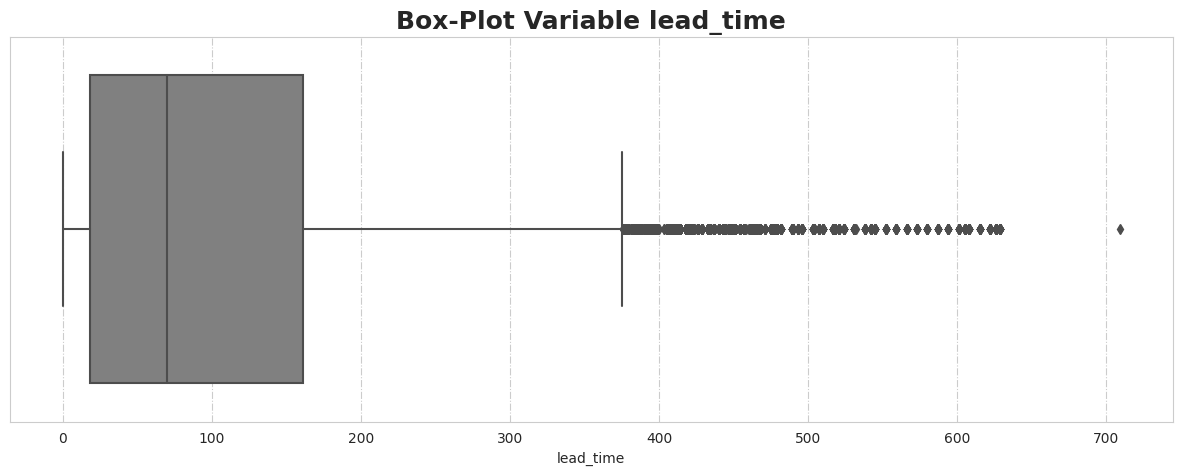

In [287]:
# gráfico boxplot de la variable "lead_time"
plt.subplots(figsize = (15,5))

sns.boxplot(data=df, x="lead_time",color="Grey")

plt.title("Box-Plot Variable lead_time",fontweight = "bold", fontsize = 18)

In [288]:
# valores estadísticos de la variable lead_time
df.lead_time.describe()

count    118565.000000
mean        104.505832
std         106.915519
min           0.000000
25%          18.000000
50%          70.000000
75%         161.000000
max         709.000000
Name: lead_time, dtype: float64

In [289]:
# cantidad de valores atípicos
df[df["lead_time"] > 380].shape[0]

2798

In [290]:
# % porcentaje de valores atípicos
df[df["lead_time"] > 380].shape[0]/df.shape[0]

0.02359886981824316

Text(0.5, 1.0, 'Box-Plot Variable days_in_waiting_list')

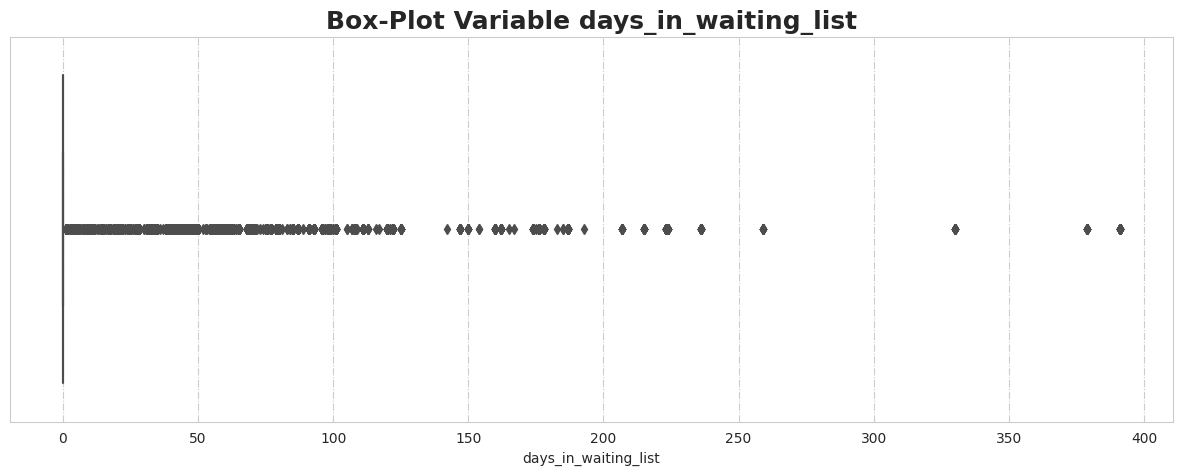

In [291]:
# gráfico bosplot de la variable "days_in_waiting_list"
plt.subplots(figsize = (15,5))

sns.boxplot(data=df, x="days_in_waiting_list",color="Grey")

plt.title("Box-Plot Variable days_in_waiting_list",fontweight = "bold", fontsize = 18)

In [292]:
# valores estadísticos de la variable days_in_waiting_list
df.days_in_waiting_list.describe()

count    118565.000000
mean          2.333016
std          17.642783
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

In [293]:
# % de valores de la variable days_in_waiting_list
df.days_in_waiting_list.value_counts(normalize=True)

0      0.968861
39     0.001915
58     0.001383
44     0.001189
31     0.001071
         ...   
175    0.000008
116    0.000008
142    0.000008
193    0.000008
36     0.000008
Name: days_in_waiting_list, Length: 127, dtype: float64

Text(0.5, 1.0, 'Box-Plot Variable ADR')

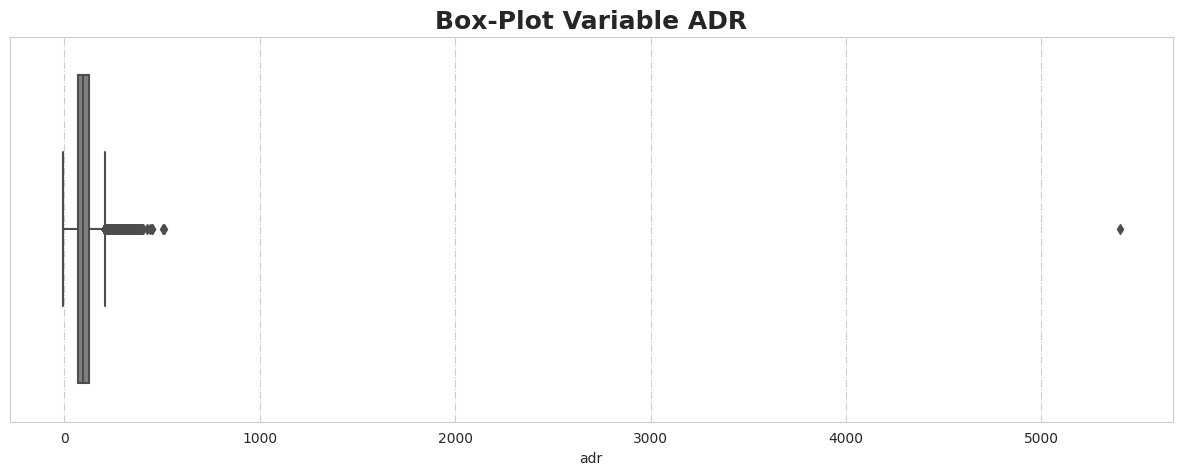

In [294]:
# gráfico bosplot de la variable "adr"
plt.subplots(figsize = (15,5))

sns.boxplot(data=df, x="adr",color="Grey")

plt.title("Box-Plot Variable ADR",fontweight = "bold", fontsize = 18)

In [295]:
# valores estadísticos de la variable adr
df.adr.describe()

count    118565.000000
mean        102.523809
std          50.005542
min          -6.380000
25%          70.000000
50%          95.000000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [296]:
# calculo del límite superior
Q1=np.percentile(df["adr"],25)
Q3=np.percentile(df["adr"],75)
IQR = Q3-Q1
outlier_step = IQR*1.5
outlier_sup = Q3+outlier_step

In [297]:
# límite superior
outlier_sup

210.0

In [298]:
# cantidad de valores atípicos
df[df["adr"] > outlier_sup].shape[0]

3891

In [299]:
# % porcentaje de valores atípicos
df[df["adr"] > 189].shape[0]/df.shape[0]

0.05578374731160123

**Conclusiones sobre valores atípicos:**

1. La variable lead_time posee el 2% de sus valores que se considerarían como outliers; es un % muy bajo y quizás estos valores puedan aportan información al análisis por lo que no se realizan acciones sobre la variable.

2. La variable days_in_waiting_list posee el 96 % de sus valores en 0; el % restante varia ampliamente hasta los 400 días. Al igual que la variable anterior, se decide no realizar acciones ya que estos valores "fuera de la norma" podrían aportar valor al análisis.

3. En cuando a la variable ADR, si se detectaron algunos valores muy alejados y algunos valores negativos. Se dispone un rango entre 1 y 189 usd y se anulan los valores por fuera de ellos.


In [300]:
df.drop(df[df["adr"] < 1].index,inplace=True)

In [301]:
df.drop(df[df["adr"] > outlier_sup].index,inplace=True)

In [302]:
df.shape[0]

113506

Text(0.5, 1.0, 'Box-Plot Variable ADR sin outliers')

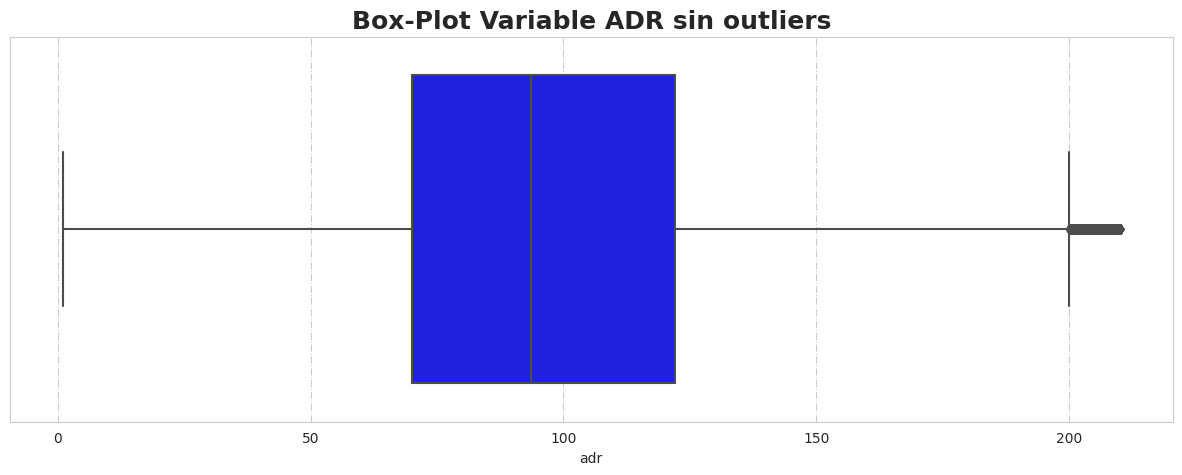

In [303]:
plt.subplots(figsize = (15,5))
sns.boxplot(data=df, x="adr",color="Blue")
plt.title("Box-Plot Variable ADR sin outliers",fontweight = "bold", fontsize = 18)

# **Análisis Exploratorio de Datos (EDA)**
El EDA será orientado a las preguntas planteadas en la sección Preguntas de Negocio.

## **1.   ¿Cuál es el hotel más demandado y cuál de ellos posee mayor % de cancelaciones?**

In [304]:
# porcentaje de reservas entre los tipos de hotel
df["hotel"].value_counts(normalize = True)

City Hotel      0.676396
Resort Hotel    0.323604
Name: hotel, dtype: float64

In [305]:
# porcentaje de cancelaciones
df["is_canceled"].value_counts(normalize = True)

0    0.625535
1    0.374465
Name: is_canceled, dtype: float64

Text(0, 0.5, 'N° reservas')

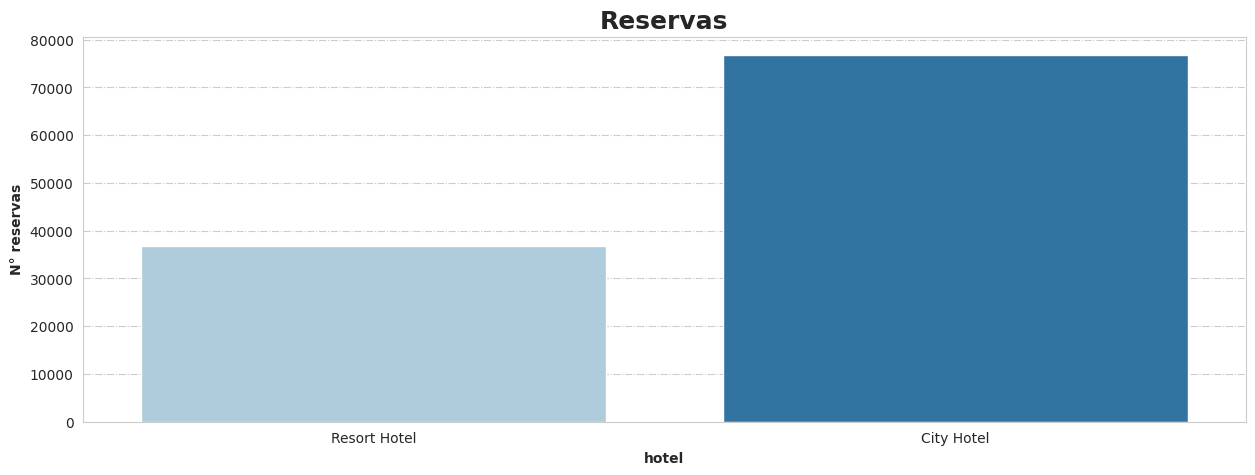

In [306]:
# reservas s/ hotel
plt.subplots(figsize = (15,5))
sns.countplot (data=df, x="hotel",palette = sns.color_palette("Paired", 2))
plt.title("Reservas",fontweight = "bold", fontsize = 18)
plt.xlabel("hotel",fontweight = "bold",fontsize = 10)
plt.ylabel("N° reservas",fontweight = "bold",fontsize = 10)


[Text(0, 0, 'efectiva'), Text(1, 0, 'cancelada')]

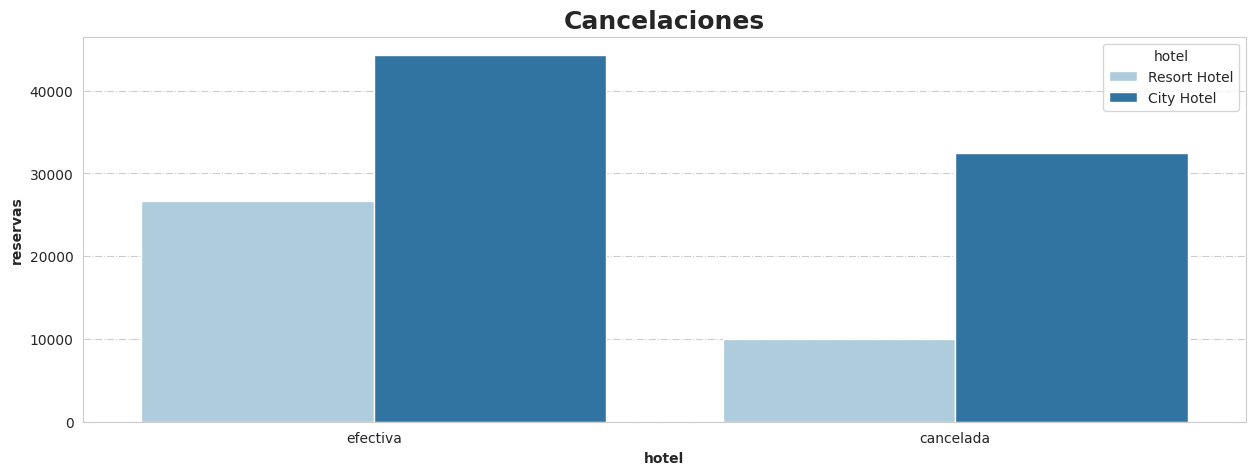

In [307]:
# gráfico de cancelaciones s/hotel
plt.subplots(figsize = (15,5))

a=sns.countplot (data=df, x="is_canceled", hue="hotel",palette = sns.color_palette("Paired", 3))

plt.title("Cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("hotel",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)
a.set_xticklabels(["efectiva","cancelada"])

In [308]:
# agrupación de valores entre hoteles y cancelaciones
cancelaciones = df.groupby(['is_canceled', "hotel"]).size().unstack(fill_value=0)
cancelaciones

hotel,City Hotel,Resort Hotel
is_canceled,,
0,44304,26698
1,32471,10033


In [309]:
# sumatoria de reservas s/hotel
cancelaciones.sum()

hotel
City Hotel      76775
Resort Hotel    36731
dtype: int64

**El hotel más demandado es el City Hotel representando el 66 % de las reservas en el dataset.**

**Con respecto a las cancelaciones a nivel general el 37 % de las reservas se cancelan.**

Analizando con el tipo de hotel, se obtiene que los % de cancelaciones son los siguientes:

* City Hotel: 40 % de cancelaciones (27 % del total)

* Resort Hotel: 27 % de cancelaciones (6 % del total)

## **2. ¿Cuáles son las épocas del año más demandas? ¿Qué sucede con las estadías?**

In [310]:
# orden de los meses del año en la variable
df=df.replace({"arrival_date_month":{"January":1,"February":2,"March":3,"April":4,"May":5,
                                  "June":6,"July":7,"August":8,"September":9,"October":10,
                                  "November":11,"December":12}})

Text(0, 0.5, 'reservas')

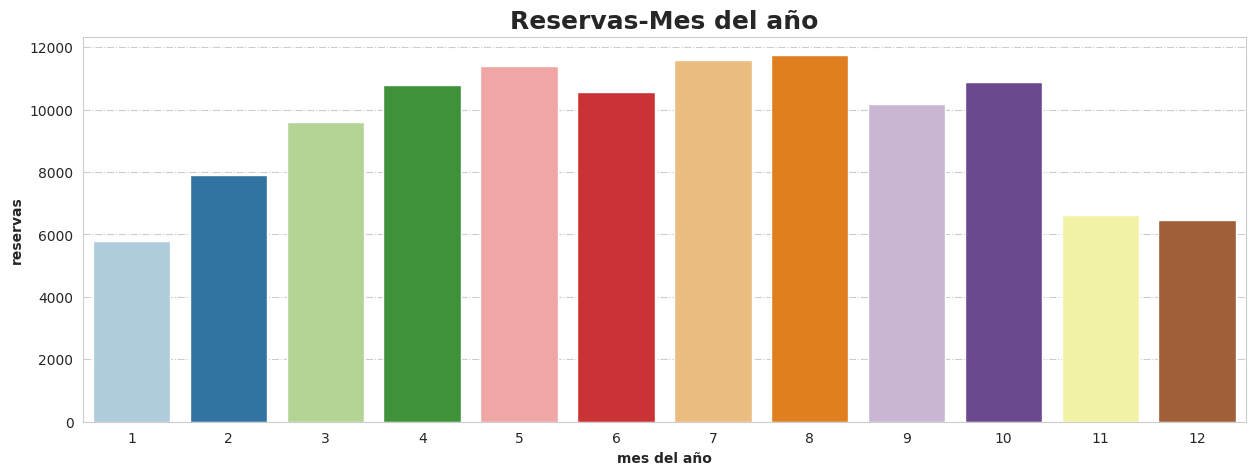

In [311]:
# gráfico de barras de la variable "arrival_date_month"
dm = df.groupby("arrival_date_month")["arrival_date_month"].count()

plt.subplots(figsize = (15,5))

sns.barplot(x=dm.index, y=dm, palette = sns.color_palette("Paired", 12))

plt.title("Reservas-Mes del año",fontweight = "bold", fontsize = 18)
plt.xlabel("mes del año",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

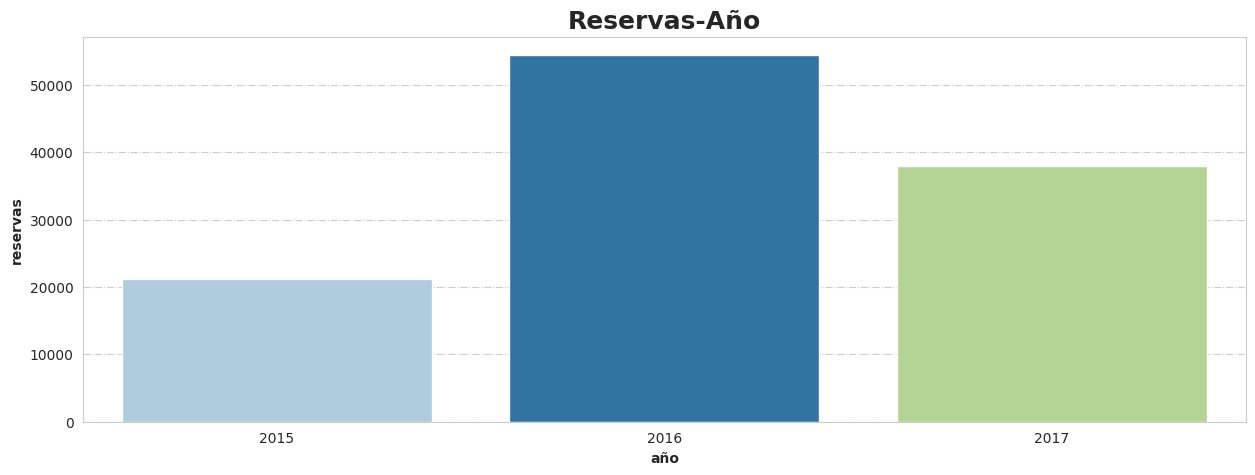

In [312]:
# gráfico de barras de la variable "arrival_date_year"
yr = df.groupby("arrival_date_year")["arrival_date_year"].count()

plt.subplots(figsize = (15,5))

sns.barplot(x=yr.index, y=yr, palette = sns.color_palette("Paired", 3))

plt.title("Reservas-Año",fontweight = "bold", fontsize = 18)
plt.xlabel("año",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [313]:
# % de datos de reservas por año
df["arrival_date_year"].value_counts(normalize = True)

2016    0.479349
2017    0.334617
2015    0.186034
Name: arrival_date_year, dtype: float64

In [314]:
# reservas por año y mes
y_m = df.groupby(["arrival_date_year","arrival_date_month"]).size().unstack(fill_value=0)
y_m

arrival_date_month,1,2,3,4,5,6,7,8,9,10,11,12
arrival_date_year,,,,,,,,,,,,
2015,0,0,0,0,0,0,2686,3619,4962,4817,2273,2759
2016,2182,3814,4720,5326,5324,5196,4242,4280,5230,6052,4349,3694
2017,3614,4084,4875,5470,6054,5373,4666,3845,0,0,0,0


Text(0, 0.5, 'reservas')

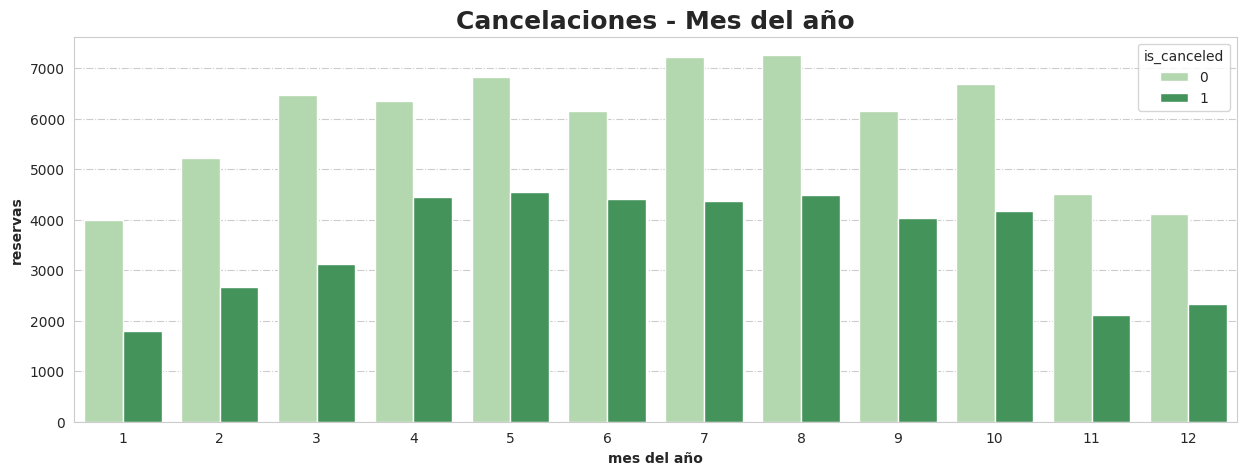

In [315]:
# cancelaciones por mes del año
plt.subplots(figsize = (15,5))

sns.countplot (data=df, x= "arrival_date_month", hue="is_canceled", palette = sns.color_palette("Greens", 2))

plt.title("Cancelaciones - Mes del año",fontweight = "bold", fontsize = 18)
plt.xlabel("mes del año",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)


Text(0, 0.5, 'reservas')

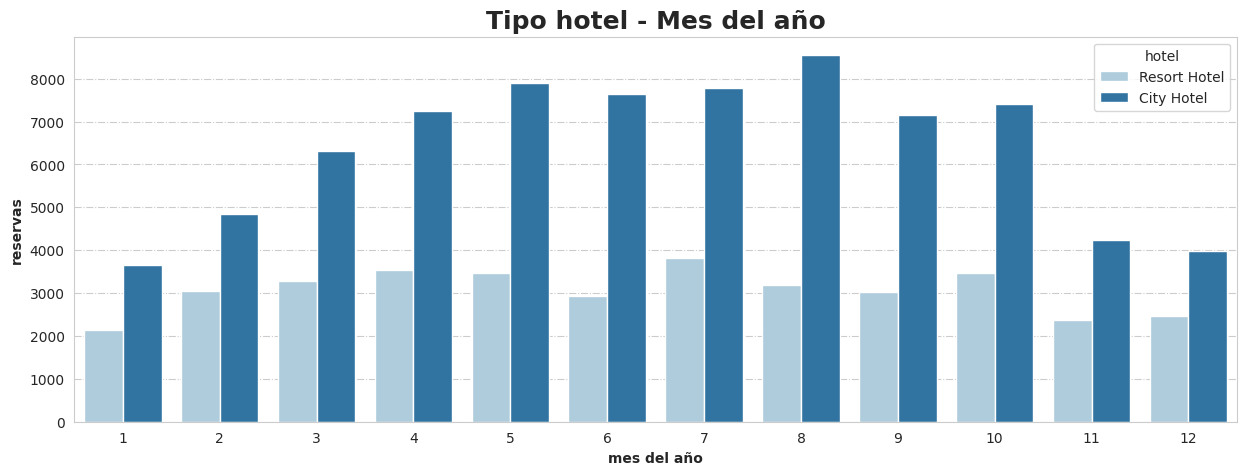

In [316]:
# reservas en cada hotel por mes del año
plt.subplots(figsize = (15,5))

sns.countplot (data=df, x= "arrival_date_month", hue="hotel", palette = sns.color_palette("Paired", 2))

plt.title("Tipo hotel - Mes del año",fontweight = "bold", fontsize = 18)
plt.xlabel("mes del año",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [317]:
#cancelaciones por mes del año
m = df.groupby(["is_canceled","arrival_date_month"]).size().unstack(fill_value=0)
m

arrival_date_month,1,2,3,4,5,6,7,8,9,10,11,12
is_canceled,,,,,,,,,,,,
0,4001,5228,6475,6353,6830,6157,7218,7261,6154,6689,4518,4118
1,1795,2670,3120,4443,4548,4412,4376,4483,4038,4180,2104,2335


In [318]:
m.apply(sum)

arrival_date_month
1      5796
2      7898
3      9595
4     10796
5     11378
6     10569
7     11594
8     11744
9     10192
10    10869
11     6622
12     6453
dtype: int64

In [319]:
df.shape

(113506, 31)

In [320]:
# valores estadíticos de la variable stays_in_weekend_nights
df["stays_in_weekend_nights"].describe()

count    113506.000000
mean          0.929035
std           0.992937
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          19.000000
Name: stays_in_weekend_nights, dtype: float64

In [321]:
# % de reservas que no fueron durante el fin de semana
df[df["stays_in_weekend_nights"] == 0].shape[0]/df.shape[0]

0.43297270628865436

Text(0.5, 1.0, 'Box-Plot Variable stays_in_weekend_nights')

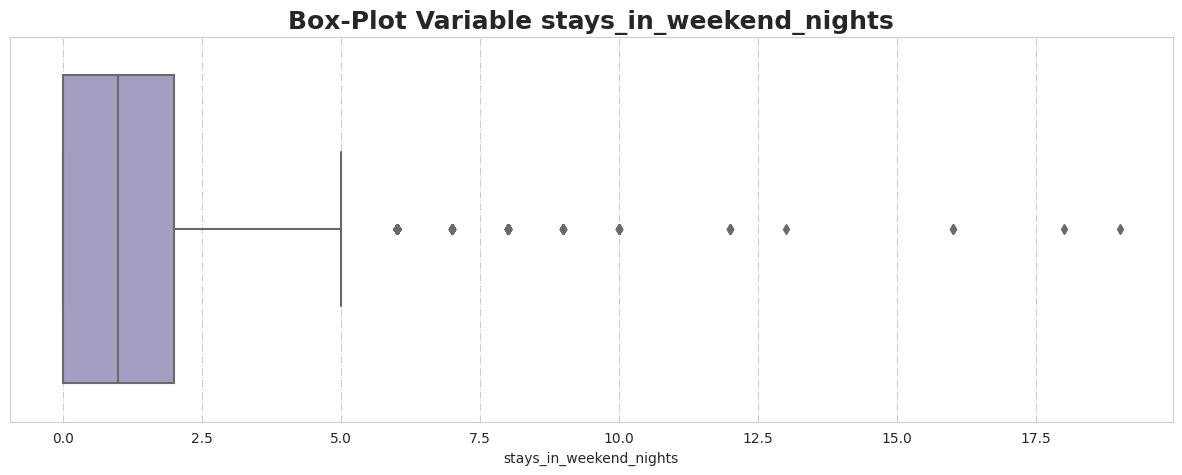

In [322]:
# gráfico boxplot de la variable "stays_in_weekend_nights"
plt.subplots(figsize = (15,5))

sns.boxplot(data=df, x="stays_in_weekend_nights", palette = "Purples")

plt.title("Box-Plot Variable stays_in_weekend_nights",fontweight = "bold", fontsize = 18)

Text(0, 0.5, 'reservas')

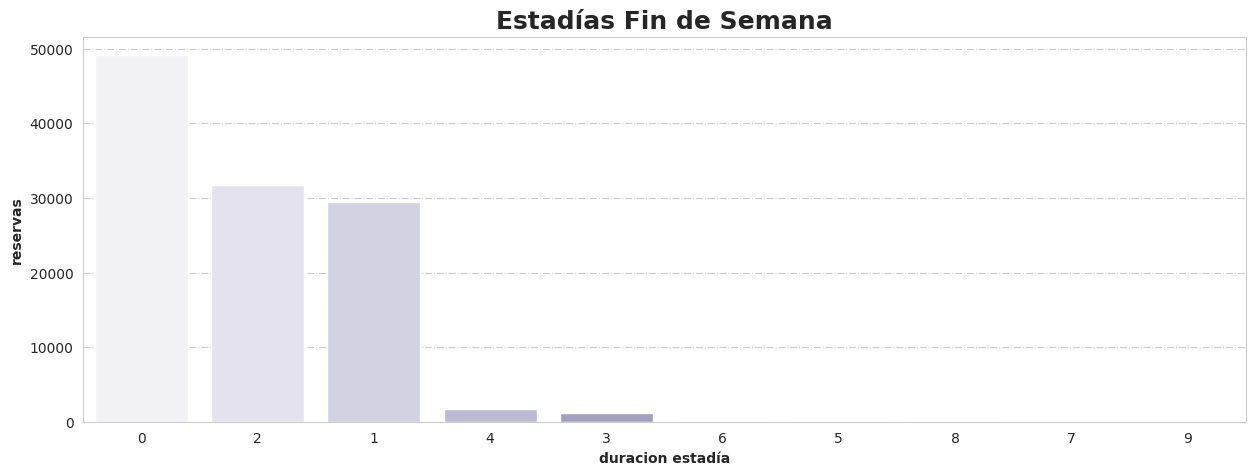

In [323]:
# comportamiento de las reservas "stays_in_weekend_nights"
plt.subplots(figsize = (15,5))

stay_weekend_order=df.stays_in_weekend_nights.value_counts().index[:10]
sns.countplot(x="stays_in_weekend_nights", data=df, order=stay_weekend_order, palette = sns.color_palette("Purples", 9))

plt.title("Estadías Fin de Semana",fontweight = "bold", fontsize = 18)
plt.xlabel("duracion estadía",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)


In [324]:
# verificación en qué casos hay estadías de más de 3 días
df[df["stays_in_weekend_nights"] >= 3].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,7,27,1,4,10,1,...,2,No Deposit,NI,0,Transient,62.00,0,2,Check-Out,2015-07-15
31,Resort Hotel,0,95,2015,7,27,1,4,11,2,...,0,No Deposit,241.0,0,Transient,63.86,0,0,Check-Out,2015-07-16
51,Resort Hotel,0,93,2015,7,27,2,3,8,2,...,0,No Deposit,156.0,0,Contract,56.01,0,0,Check-Out,2015-07-13
52,Resort Hotel,0,76,2015,7,27,2,4,10,2,...,0,No Deposit,243.0,0,Contract,110.70,0,0,Check-Out,2015-07-16
81,Resort Hotel,1,368,2015,7,27,3,3,7,2,...,0,No Deposit,40.0,0,Contract,55.68,0,0,Canceled,2015-05-19


In [325]:
# valores estadísticos de la variable stays_in_week_nights
df["stays_in_week_nights"].describe()

count    113506.000000
mean          2.501084
std           1.885667
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          50.000000
Name: stays_in_week_nights, dtype: float64

Text(0.5, 1.0, 'Box-Plot Variable stays_in_week_nights')

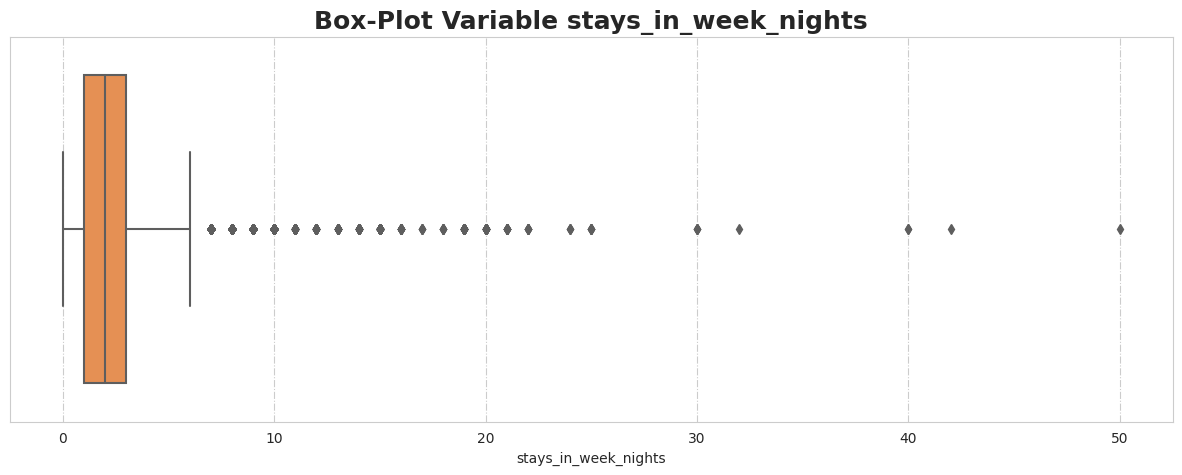

In [326]:
# gráfico boxplot de la variable "stays_in_week_nights"
plt.subplots(figsize = (15,5))

sns.boxplot(data=df, x="stays_in_week_nights", palette = "Oranges")

plt.title("Box-Plot Variable stays_in_week_nights",fontweight = "bold", fontsize = 18)

Text(0, 0.5, 'reservas')

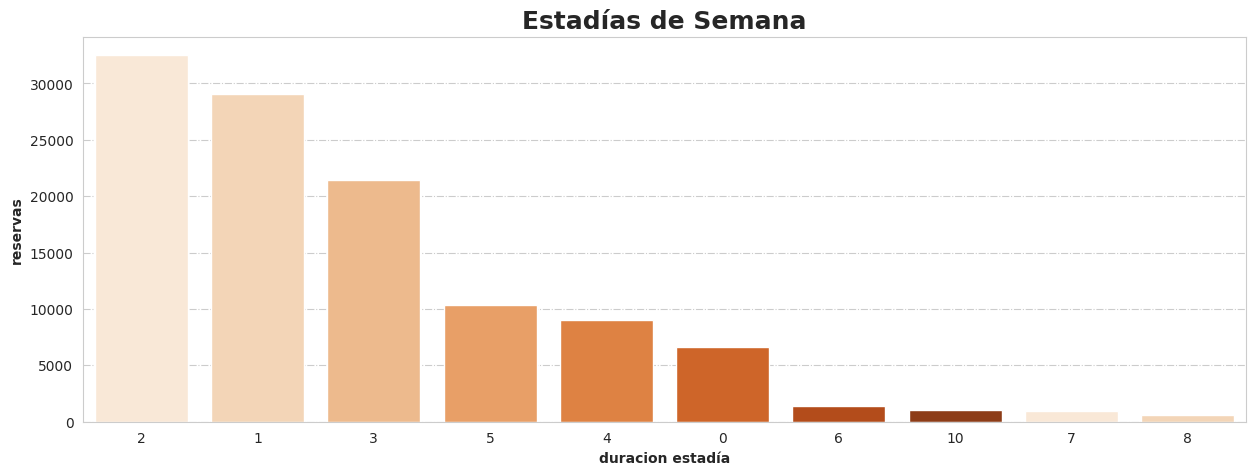

In [327]:
# comportamiento de las reservas "stays_in_week_night"
plt.subplots(figsize = (15,5))

stay_week_order=df.stays_in_week_nights.value_counts().index[:10]
sns.countplot(x="stays_in_week_nights", data=df, order=stay_week_order, palette = sns.color_palette("Oranges", 8))

plt.title("Estadías de Semana",fontweight = "bold", fontsize = 18)
plt.xlabel("duracion estadía",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

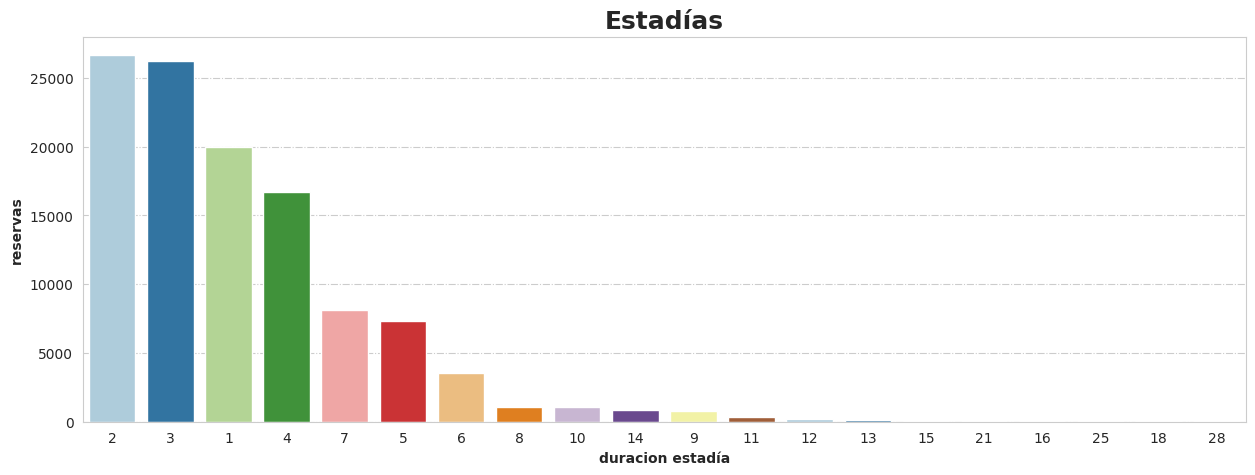

In [328]:
# análisis de las estadías en total
plt.subplots(figsize = (15,5))

df["stays"] = df["stays_in_week_nights"] + df["stays_in_weekend_nights"]
stay_order=df.stays.value_counts().index[:20]
sns.countplot(x="stays", data=df, order=stay_order, palette = sns.color_palette("Paired", 20))

plt.title("Estadías",fontweight = "bold", fontsize = 18)
plt.xlabel("duracion estadía",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

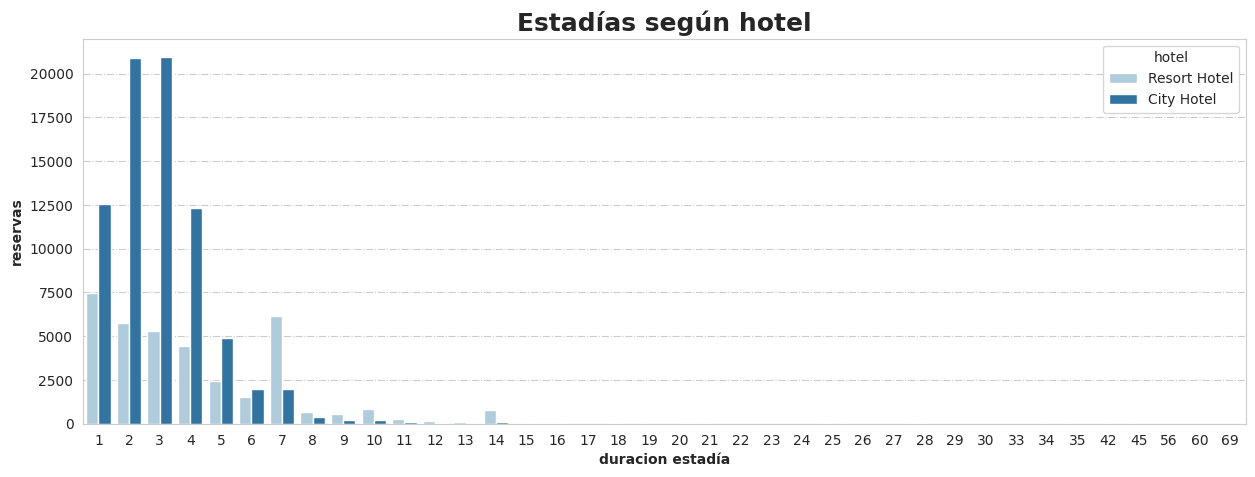

In [329]:
# análisis entre las estadías en total y el tipo de hotel
plt.subplots(figsize = (15,5))

sns.countplot(x="stays", data=df, hue="hotel", palette = sns.color_palette("Paired", 2))

plt.title("Estadías según hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("duracion estadía",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'duracion estadías')

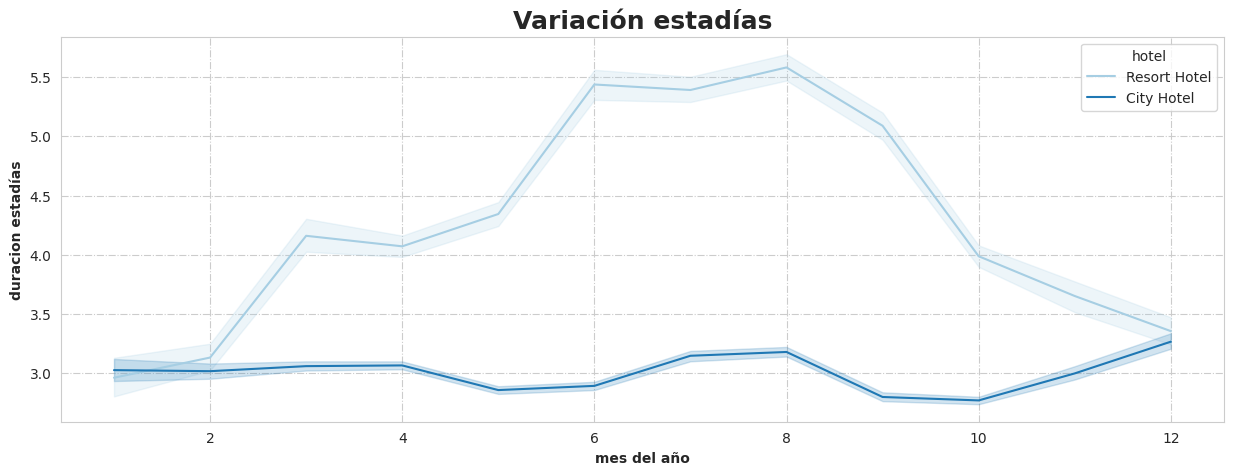

In [330]:
#variación de la estadía en función del mes del año y el tipo de hotel
plt.subplots(figsize = (15,5))

sns.lineplot(data=df, x="arrival_date_month", y= "stays", hue="hotel", palette = sns.color_palette("Paired", 2))

plt.title("Variación estadías",fontweight = "bold", fontsize = 18)
plt.xlabel("mes del año",fontweight = "bold",fontsize = 10)
plt.ylabel("duracion estadías",fontweight = "bold",fontsize = 10)

In [331]:
df["stays"].describe()

count    113506.000000
mean          3.430118
std           2.521444
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stays, dtype: float64

In [332]:
# duración de la estadía promedio
df["stays"].mean()

3.430118231635332

In [333]:
df_stays = df[["stays","hotel"]].groupby(by=["hotel"]).mean().reset_index()
df_stays

,hotel,stays
0,City Hotel,2.994660
1,Resort Hotel,4.340312


En esta sección se analizaron los años, meses y estadías de las reservas.

Verificando los años, se concluye que sólo existe un año completo en información (año 2016) dado que el año 2015 tiene la 2da mitad y el 2017 la primer mitad. De todas formas, no se observan patrones disparejos entre los años.

**El mes de mayor demanda es Agosto y el de menor demanda es Enero; dichos meses resultan ser aquellos que tienen datos en los 3 años. Considerando que los hoteles se encuentran en Portugal, coiciden con el Verano e Invierno.**

Analizando las demandas por año, los resultados son las siguientes:

2015 = Bajo:Noviembre / Alto: Septiembre

2016 = Bajo:Enero / Alto: Octubre

2017 = Bajo: Enero / Alto: Mayo

**En cuanto a las cancelaciones, se observa que el comportamiento es indiferente según la época del año.**

Con respecto a las estadías, entre fin de semana y semana se ven estadías cortas. **La estadía promedio es de 3 días.**

**El Resort Hotel agenda estadías más largas siendo el promedio de 4 días, mientras que el City Hotel posee estadías promedio de 2 días.**

A lo largo del año se observa que el City Hotel posee un comportamiento uniforme, mientras que en el Resort picos de demanda a lo largo del año.

## **3.¿Como se comporta el cliente con respecto al tiempo previo de arribo al hotel? ¿Tiene que ver con la Nacionalidad o Composición Familiar?**

In [334]:
# descripción de la variable "lead_time"
df["lead_time"].describe()

count    113506.000000
mean        106.195347
std         107.776408
min           0.000000
25%          19.000000
50%          72.000000
75%         164.000000
max         709.000000
Name: lead_time, dtype: float64

Text(0.5, 1.0, 'Box-Plot Variable lead_time')

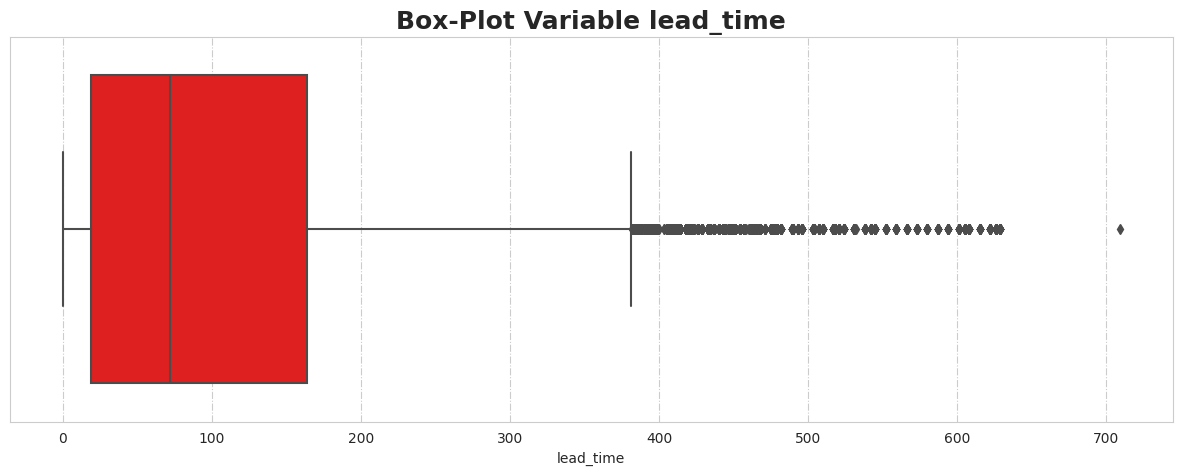

In [335]:
# gráfico bosplot de la variable "lead_time"
plt.subplots(figsize = (15,5))
sns.boxplot(data=df, x="lead_time",color="Red")
plt.title("Box-Plot Variable lead_time",fontweight = "bold", fontsize = 18)

In [336]:
# cantidad de registros tiempos de espera de más de 380 días
df[df["lead_time"] >= 380].shape[0]

2784

Text(0, 0.5, 'reservas')

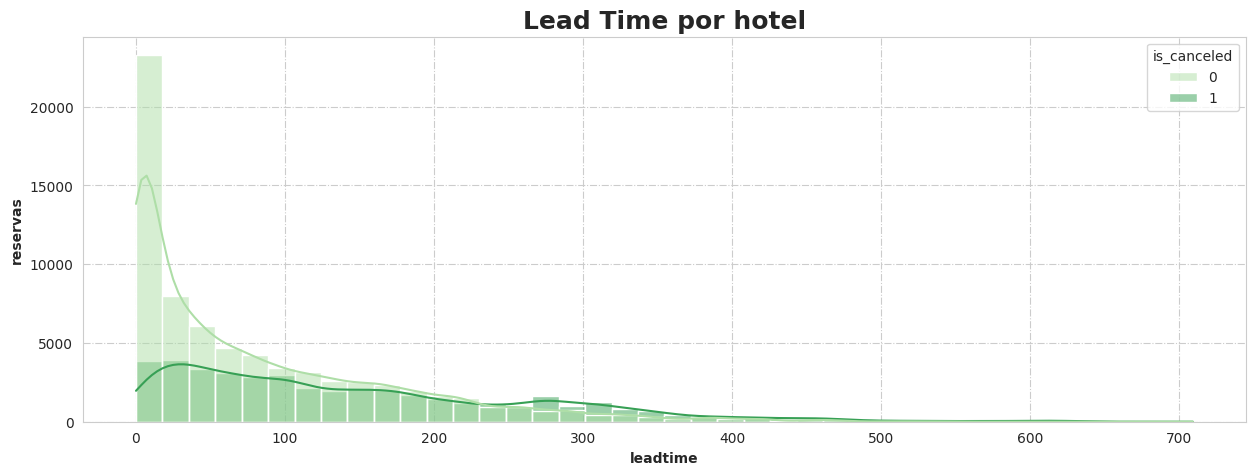

In [337]:
# distribución de la variable "lead_time"
plt.subplots(figsize = (15,5))

sns.histplot(data = df, x = "lead_time", hue ="is_canceled", bins = 40, kde = True, palette = "Greens")

plt.title("Lead Time por hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("leadtime",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

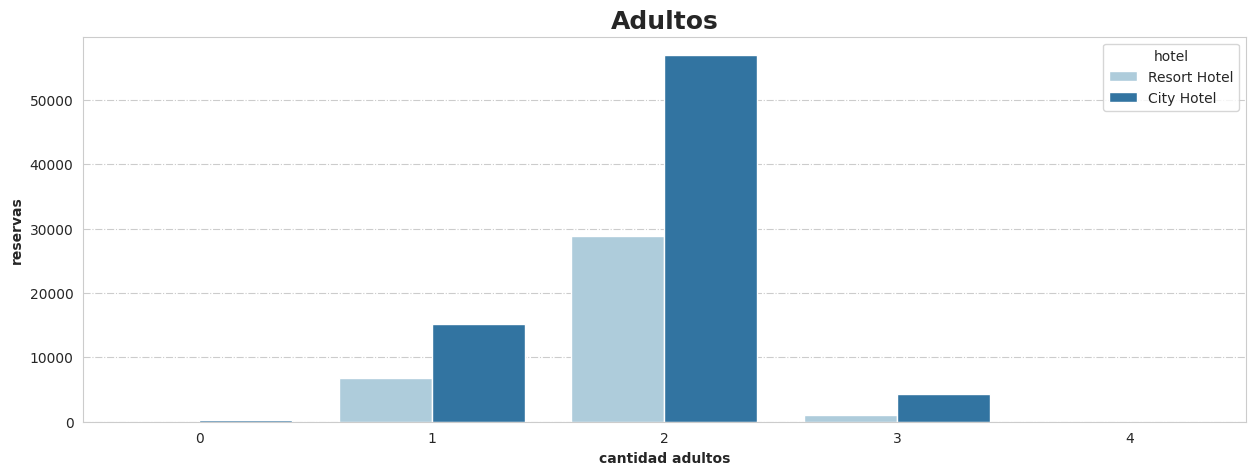

In [338]:
# comportamiento cantidad de adultos
plt.subplots(figsize = (15,5))

sns.countplot(x="adults", data=df, hue= "hotel",palette = sns.color_palette("Paired", 2))

plt.title("Adultos",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad adultos",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [339]:
# descripción de la variable "adults"
df["adults"].describe()

count    113506.000000
mean          1.850475
std           0.477762
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           4.000000
Name: adults, dtype: float64

In [340]:
# se consideran los bebés y niños en la misma variable
df["kids"] = df["babies"] + df["children"]

Text(0, 0.5, 'reservas')

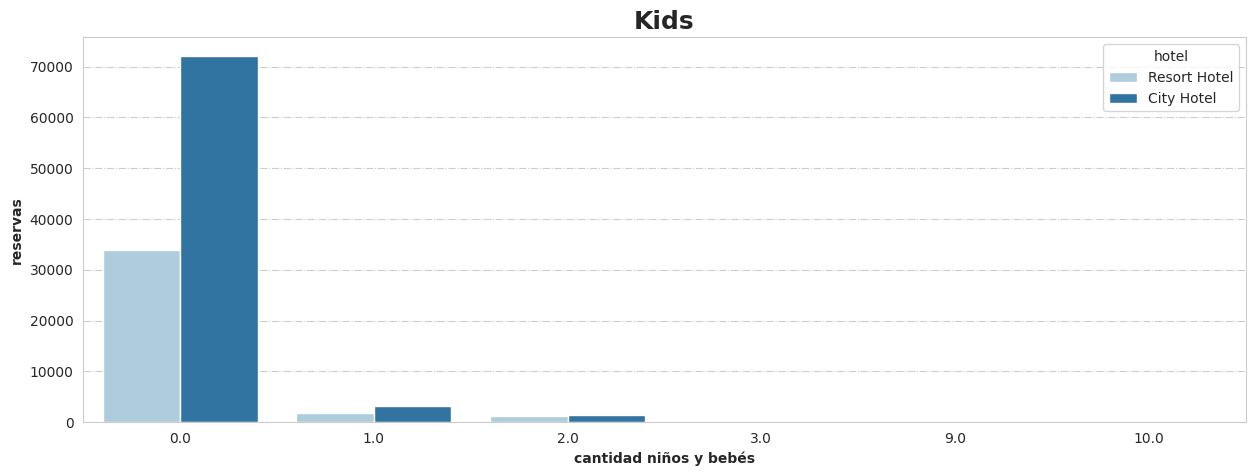

In [341]:
# comportamiento cantidad niños
plt.subplots(figsize = (15,5))

sns.countplot(x="kids", data=df, hue="hotel",palette = sns.color_palette("Paired", 2))

plt.title("Kids",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad niños y bebés",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

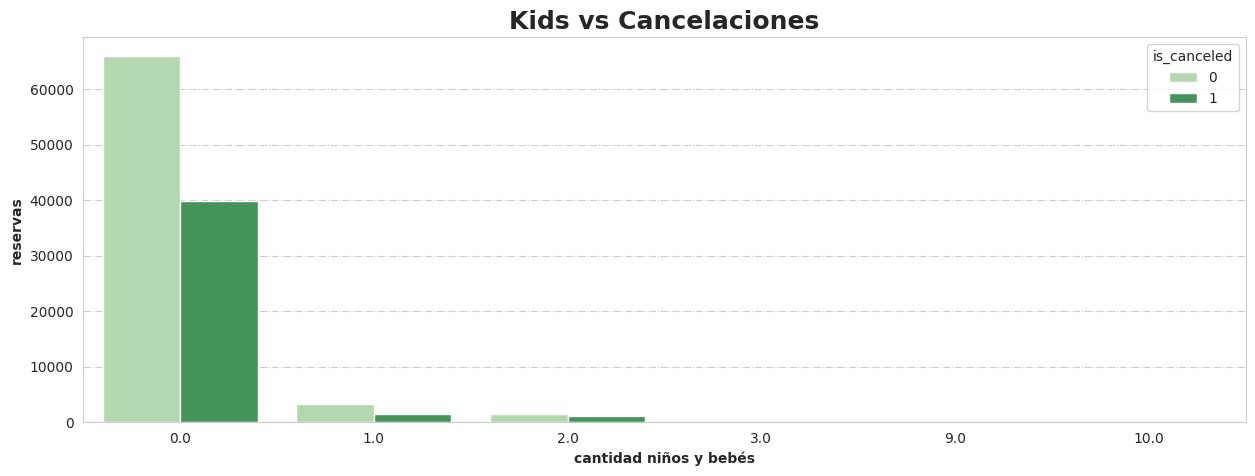

In [342]:
#comportamiento niños y cancelaciones
plt.subplots(figsize = (15,5))

sns.countplot(x="kids", data=df, hue="is_canceled",palette = sns.color_palette("Greens", 2))

plt.title("Kids vs Cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad niños y bebés",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [343]:
# % de nacionalidades
df["country"].value_counts(normalize=True)

PRT    0.402375
GBR    0.103580
FRA    0.088727
ESP    0.068666
DEU    0.063019
         ...   
MYT    0.000009
UMI    0.000009
FJI    0.000009
HND    0.000009
BDI    0.000009
Name: country, Length: 176, dtype: float64

Text(0, 0.5, 'reservas')

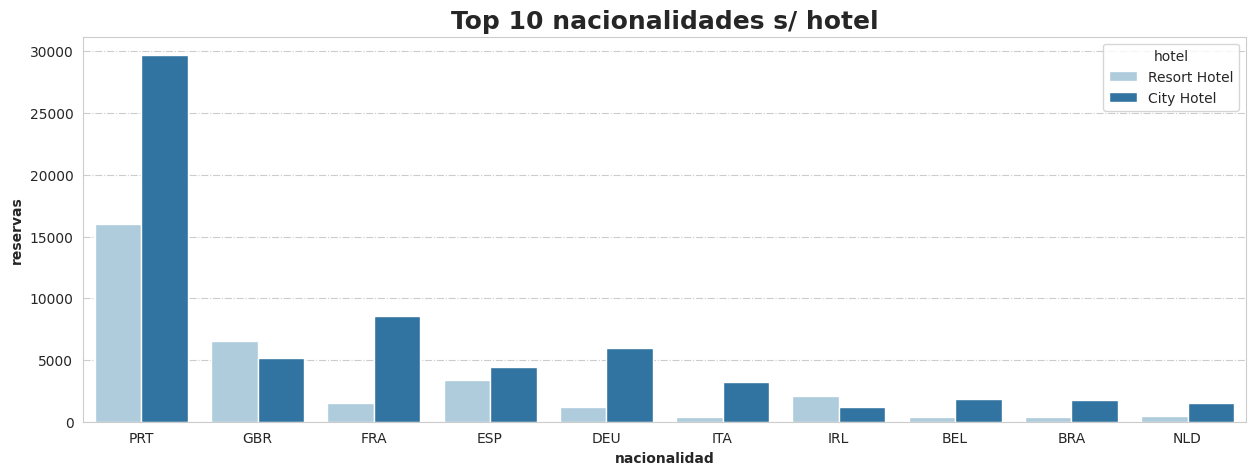

In [344]:
# gráfico de barras de la variable "country" en relación al tipo de hotel
plt.subplots(figsize = (15,5))

sns.countplot(data=df, x="country",
              order=pd.value_counts(df['country']).iloc[:10].index, hue= "hotel",palette = sns.color_palette("Paired", 2))

plt.title("Top 10 nacionalidades s/ hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("nacionalidad",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

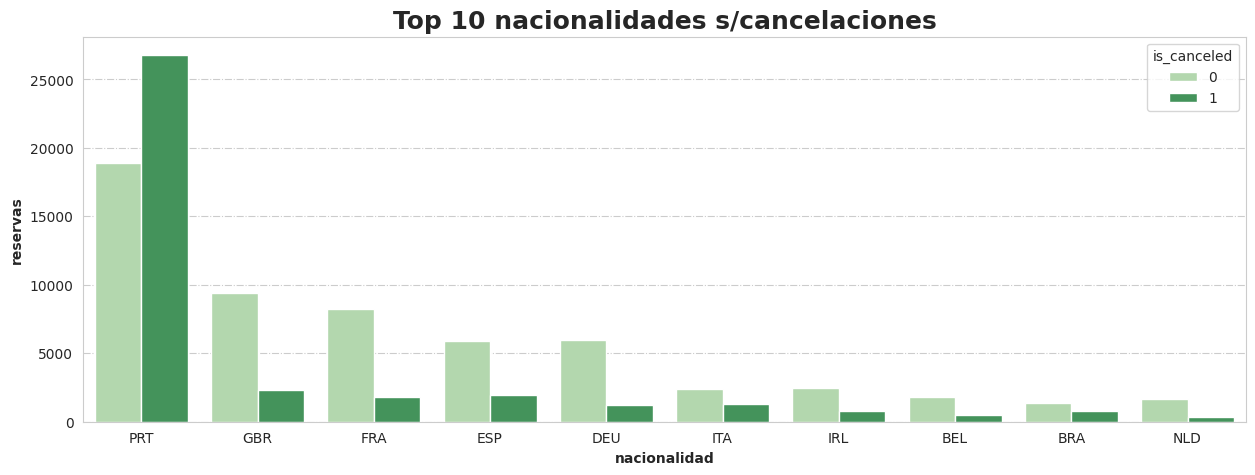

In [345]:
# gráfico de barras de la variable "country" en relación a las cancelaciones
plt.subplots(figsize = (15,5))

sns.countplot(data=df, x="country",
              order=pd.value_counts(df['country']).iloc[:10].index, hue= "is_canceled",
              palette = sns.color_palette("Greens", 2))

plt.title("Top 10 nacionalidades s/cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("nacionalidad",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [346]:
# variable "total_of_special_requests"
df["total_of_special_requests"].value_counts()

0    67430
1    31429
2    12083
3     2249
4      279
5       36
Name: total_of_special_requests, dtype: int64

Text(0, 0.5, 'reservas')

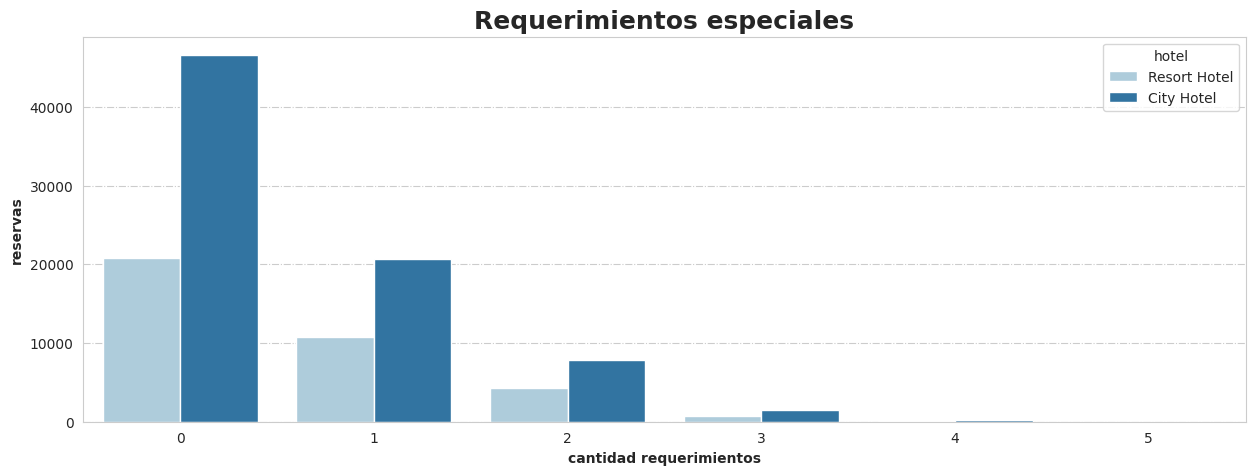

In [347]:
# comportamiento variable "total_of_special_requests" según tipo de hotel
plt.subplots(figsize = (15,5))

sns.countplot(x="total_of_special_requests", data=df, hue= "hotel", palette = sns.color_palette("Paired", 2))

plt.title("Requerimientos especiales",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad requerimientos",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

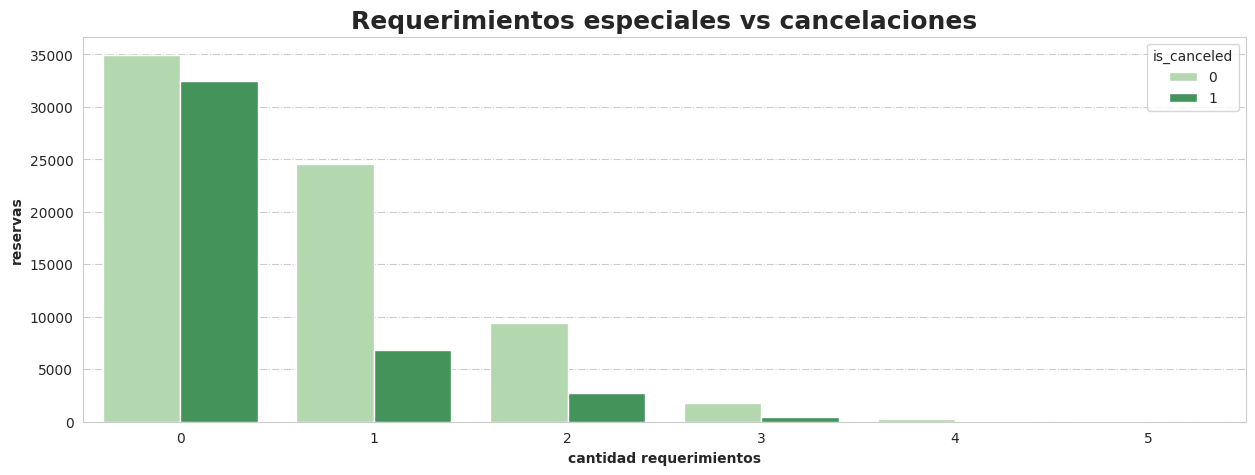

In [348]:
# comportamiento variable "total_of_special_requests" con cancelaciones
plt.subplots(figsize = (15,5))

sns.countplot(x="total_of_special_requests", data=df, hue= "is_canceled", palette = sns.color_palette("Greens", 2))

plt.title("Requerimientos especiales vs cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad requerimientos",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [349]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'stays', 'kids'],
      dtype='object')

Text(0, 0.5, 'reservas')

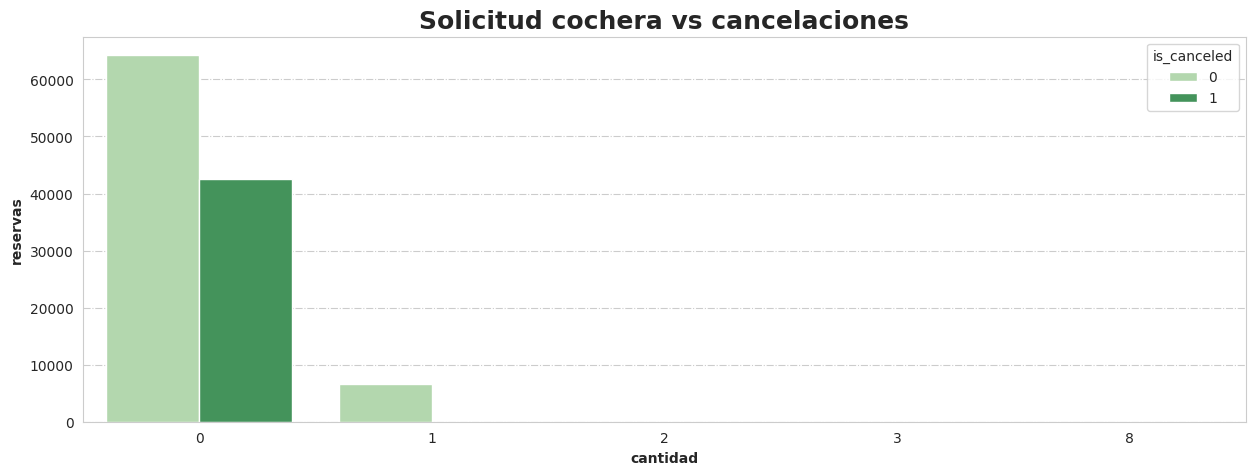

In [350]:
plt.subplots(figsize = (15,5))

sns.countplot(x="required_car_parking_spaces", data=df, hue= "is_canceled", palette = sns.color_palette("Greens", 2))

plt.title("Solicitud cochera vs cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [351]:
df["customer_type"].value_counts(normalize = True)

Transient          0.745009
Transient-Party    0.214746
Contract           0.035575
Group              0.004669
Name: customer_type, dtype: float64

Text(0, 0.5, 'reservas')

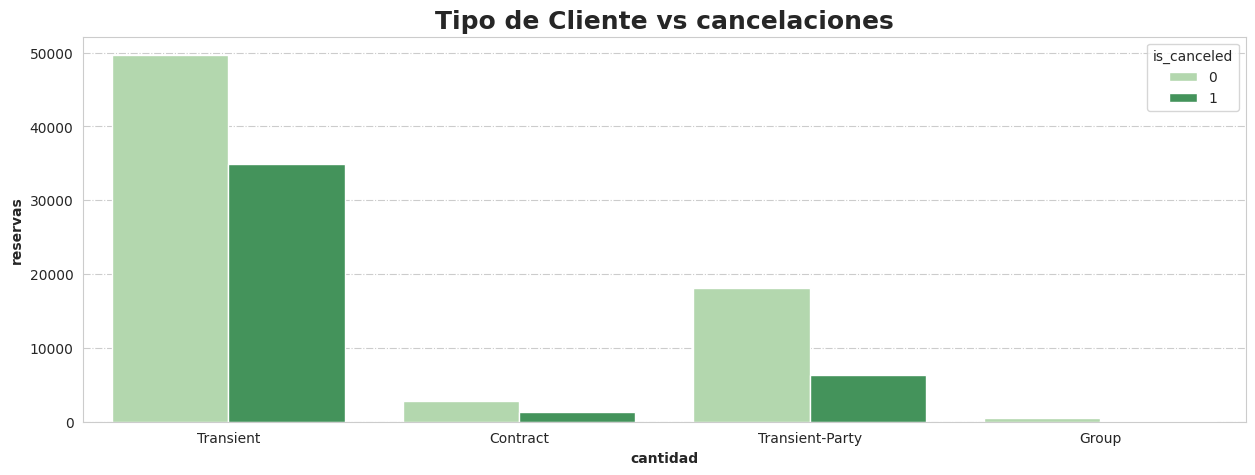

In [352]:
plt.subplots(figsize = (15,5))

sns.countplot(x="customer_type", data=df, hue= "is_canceled", palette = sns.color_palette("Greens", 2))

plt.title("Tipo de Cliente vs cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [353]:
df["market_segment"].value_counts(normalize = True)

Online TA        0.469773
Offline TA/TO    0.209478
Groups           0.171418
Direct           0.100876
Corporate        0.045848
Aviation         0.002035
Complementary    0.000555
Undefined        0.000018
Name: market_segment, dtype: float64

In [354]:
df["distribution_channel"].value_counts(normalize = True)

TA/TO        0.827824
Direct       0.113430
Corporate    0.057054
GDS          0.001647
Undefined    0.000044
Name: distribution_channel, dtype: float64

Text(0, 0.5, 'reservas')

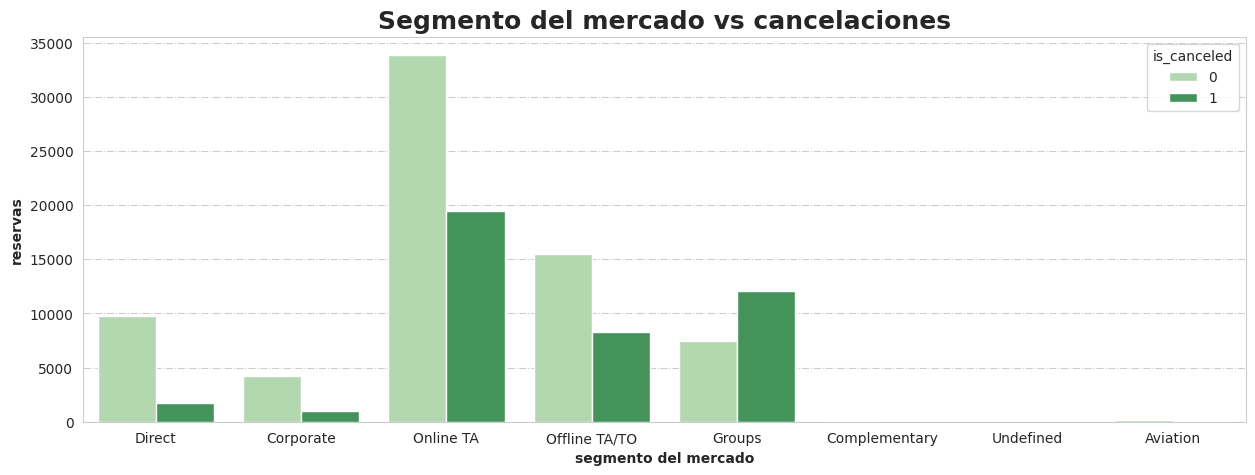

In [355]:
plt.subplots(figsize = (15,5))

sns.countplot(x="market_segment", data=df, hue= "is_canceled", palette = sns.color_palette("Greens", 2))

plt.title("Segmento del mercado vs cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("segmento del mercado",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

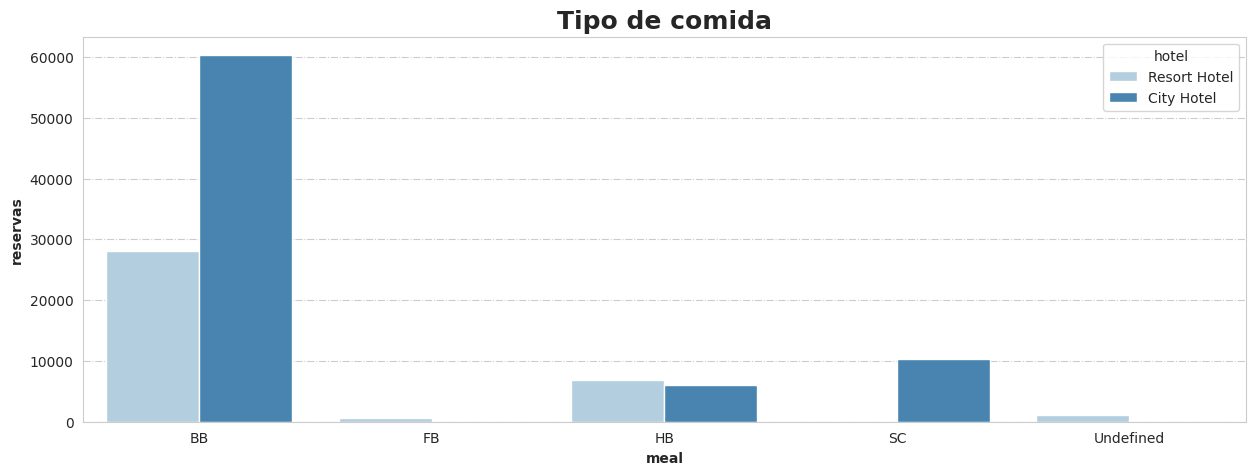

In [356]:
plt.subplots(figsize = (15,5))

sns.countplot(data = df, x = "meal", hue="hotel",
              palette = sns.color_palette("Blues", 2))

plt.title("Tipo de comida",fontweight = "bold", fontsize = 18)
plt.xlabel("meal",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

En cuanto al tipo de reserva-arribo, se observa que tiene una dispersión alta y **que a medida que aumenta el tiempo de arribo, aumentan las cancelaciones.**

La clientela del hotel se caracteriza por ser **público mayormente adulto**, principalmente parejas.

A su vez, con respecto a las nacionalidades, casi el **80 % de las reservas corresponden a Portugal**; lo que indica que tiene poca atracción internacional. Y analizando las cancelaciones en base al tipo de nacionalidad, se observa que **en los clientes nacionales es mayor el % de cancelaciones.**

Además, **si el segmento del mercado es viajes grupales, sucede lo mismo que con las nacionalidades en cuanto a las cancelaciones**, identificandose un cambio de comportamiento.

**Se observa que si el cliente tiene requerimientos especiales en su reserva, es menor el % de cancelaciones.**

## **4.¿El Hotel tiene clientela fija? ¿Como se comportan aquellos clientes frecuentes?**

[Text(0, 0, 'nuevo'), Text(1, 0, 'no nuevo')]

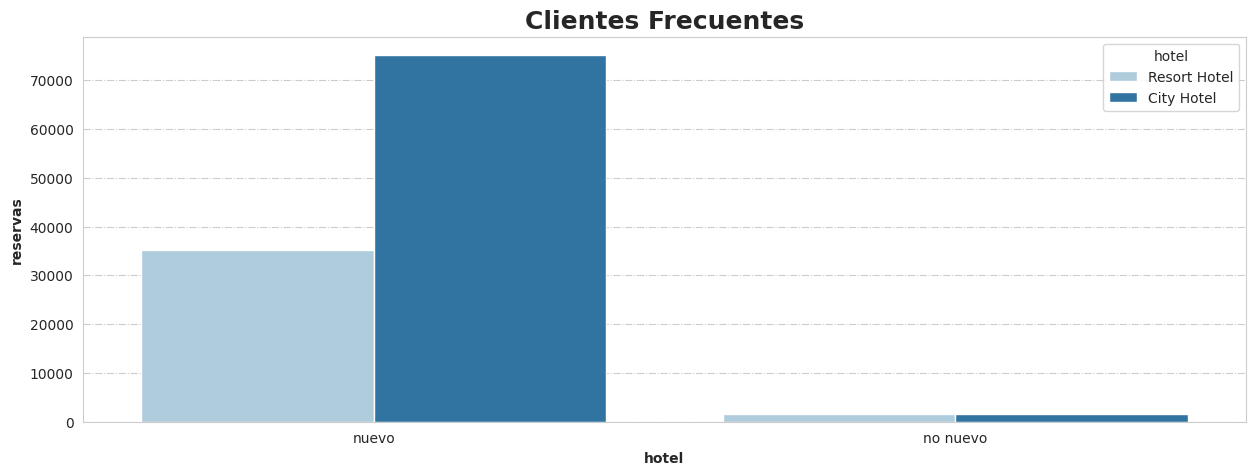

In [357]:
# gráfico de barras de la variable "is_repeated_gest"
plt.subplots(figsize = (15,5))

g = sns.countplot (data =  df, x = "is_repeated_guest", hue = "hotel",palette = sns.color_palette("Paired", 2))

plt.title("Clientes Frecuentes",fontweight = "bold", fontsize = 18)
plt.xlabel("hotel",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)
g.set_xticklabels(["nuevo","no nuevo"])


In [358]:
df["is_repeated_guest"].value_counts(normalize = True)

0    0.971649
1    0.028351
Name: is_repeated_guest, dtype: float64

In [359]:
df["previous_cancellations"].value_counts(normalize=True)

0     0.943888
1     0.052702
2     0.000855
3     0.000511
24    0.000423
11    0.000308
26    0.000229
25    0.000220
6     0.000194
19    0.000167
4     0.000141
14    0.000123
5     0.000123
13    0.000106
21    0.000009
Name: previous_cancellations, dtype: float64

In [360]:
df["previous_bookings_not_canceled"].value_counts(normalize=True)

0     0.971076
1     0.012352
2     0.004766
3     0.002687
4     0.001868
        ...   
46    0.000009
47    0.000009
49    0.000009
50    0.000009
72    0.000009
Name: previous_bookings_not_canceled, Length: 73, dtype: float64

Se observa que el **96 % de las reservas corresponden a clientes nuevos**, lo que indica que el hotel tiene un problema de fidelidad ya que se comprobó en la pregunta anterior que gran parte de los clientes son nacionales.

A su vez, al ser la mayoría clientes nuevos; pierden valor las variables previous_cancellations y previous_bookings_not_canceled ya que no tienen antecedentes para verificarlas.

## **5. ¿Como gestiona el hotel las reservas?**

In [361]:
# verificación del tipo de habitacion reservada con la asignada
def crear_columna_nueva(row):
    if row["reserved_room_type"] == row["assigned_room_type"]:
        return "No hay cambio de habitacion reservada"
    return "Cambio de habitacion reservada"

comparacion = pd.DataFrame()

comparacion["result"] = df.apply(crear_columna_nueva, axis=1)

In [362]:
# % de cambios de habitación de la reserva original
comparacion.value_counts(normalize = True)

result                               
No hay cambio de habitacion reservada    0.877777
Cambio de habitacion reservada           0.122223
dtype: float64

Text(0, 0.5, 'reservas')

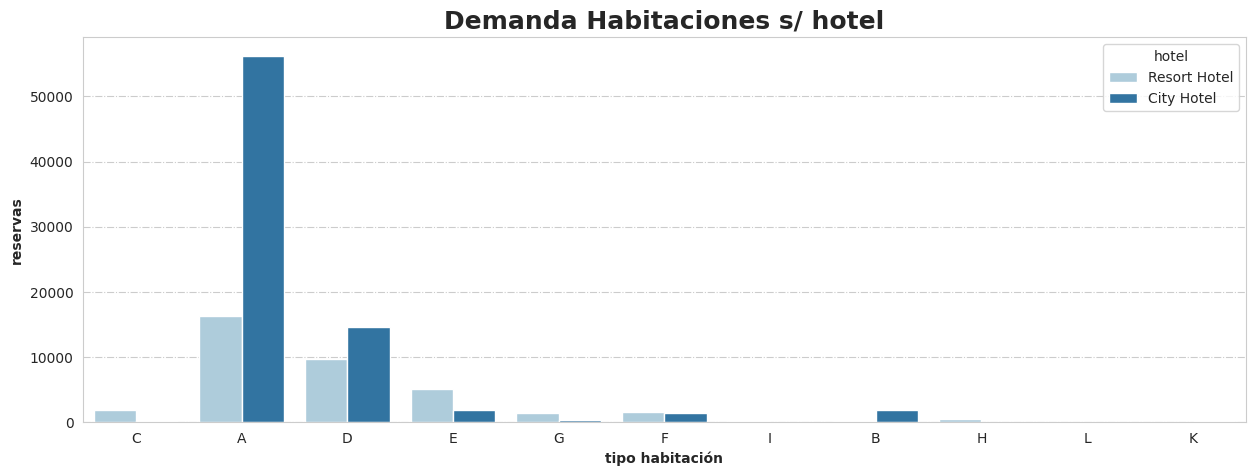

In [363]:
# habitaciones más demandadas s/ hotel
plt.subplots(figsize = (15,5))

sns.countplot(data=df, x="assigned_room_type", hue="hotel", palette = sns.color_palette("Paired", 2))

plt.title("Demanda Habitaciones s/ hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("tipo habitación",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

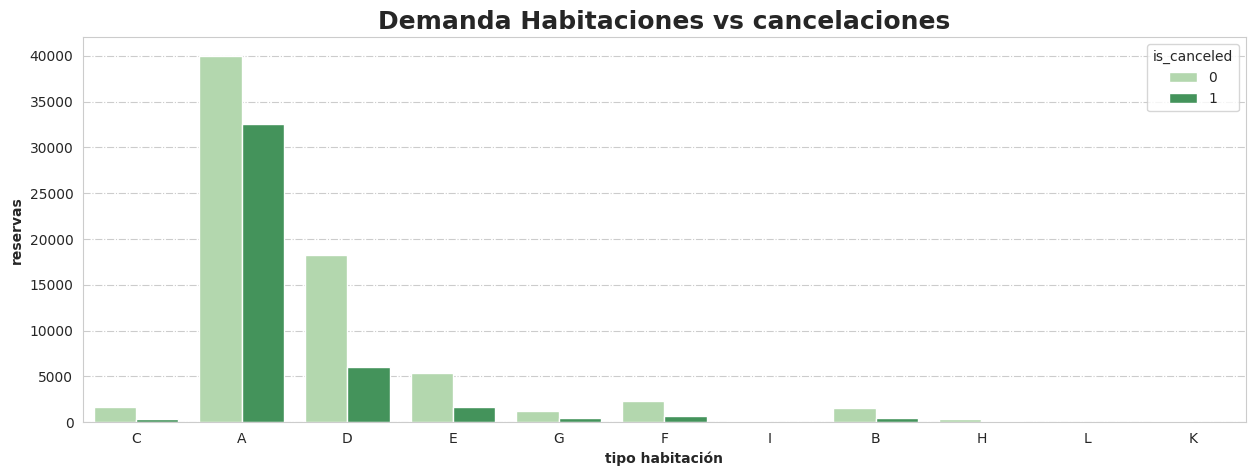

In [364]:
# habitaciones más canceladas
plt.subplots(figsize = (15,5))

sns.countplot(data=df, x="assigned_room_type", hue="is_canceled",
              palette = sns.color_palette("Greens", 2))

plt.title("Demanda Habitaciones vs cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("tipo habitación",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [365]:
#variable booking_changes
df["booking_changes"].value_counts(normalize = True)

0     0.853928
1     0.102805
2     0.031056
3     0.007374
4     0.002925
5     0.000881
6     0.000467
7     0.000238
8     0.000097
9     0.000062
13    0.000035
14    0.000026
15    0.000026
10    0.000026
16    0.000018
12    0.000009
17    0.000009
18    0.000009
11    0.000009
Name: booking_changes, dtype: float64

In [366]:
# valores estadísticos de la variable "days_in_waiting_list"
df.days_in_waiting_list.describe()

count    113506.000000
mean          2.408912
std          17.962306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         391.000000
Name: days_in_waiting_list, dtype: float64

<ipython-input-367-3d20ec596e0f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data = df[df["days_in_waiting_list"]>0], x = "days_in_waiting_list", bins = 40,kde = True, palette = "Purple")


Text(0, 0.5, 'reservas')

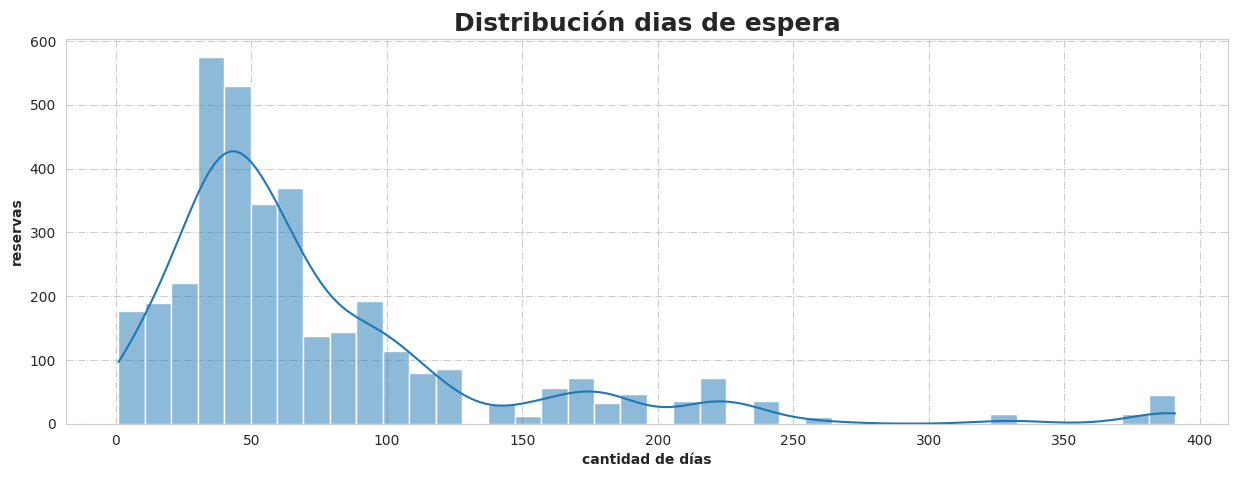

In [367]:
plt.subplots(figsize = (15,5))

sns.histplot(data = df[df["days_in_waiting_list"]>0], x = "days_in_waiting_list", bins = 40,kde = True, palette = "Purple")

plt.title("Distribución dias de espera",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad de días",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

In [368]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'stays', 'kids'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5278: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Text(0.5, 1.0, 'Correlacion entre lead_time, days_waiting_list, arrival_date_month, booking_changes vs cancelaciones')

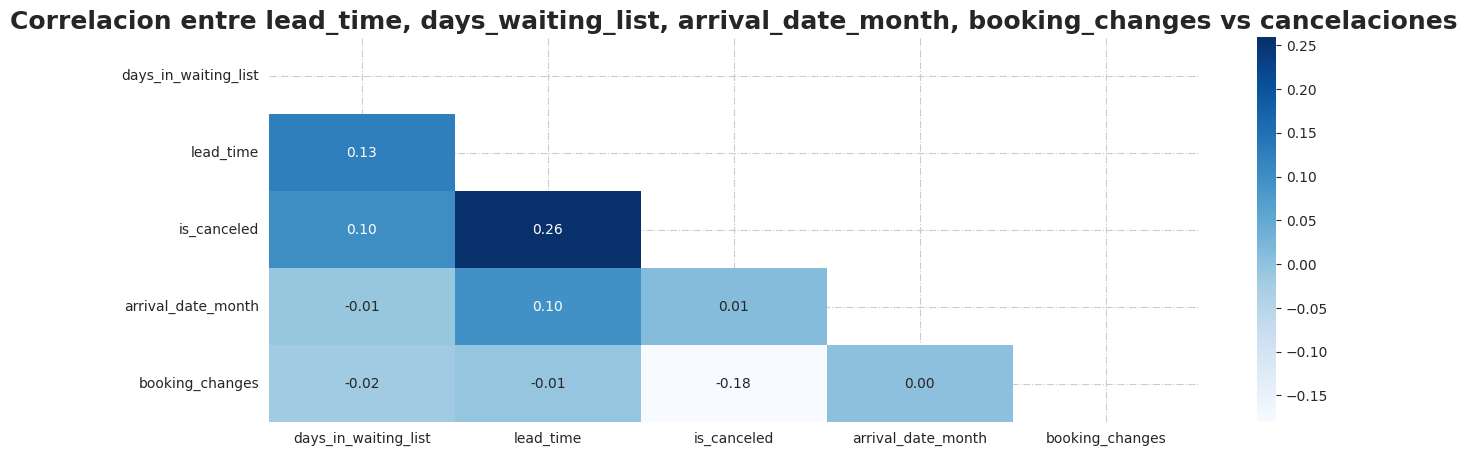

In [369]:
# correlacion con las cancelaciones
df_corr_1= df[[ "days_in_waiting_list", "lead_time" , "is_canceled",
               "arrival_date_month", "booking_changes"]].copy()
upp_mat = np.triu(df_corr_1.corr())

plt.subplots(figsize = (15,5))

sns.heatmap(df_corr_1.corr(method='kendall'),mask = upp_mat ,
            annot = True, fmt=".2f", cmap="Blues")

plt.title("Correlacion entre lead_time, days_waiting_list, arrival_date_month, booking_changes vs cancelaciones",
          fontweight = "bold", fontsize = 18)

En general, el hotel posee una buena gestión en relación con lo que solicita el cliente. **El 87 % de las veces se les asigna la habitación que reservó el cliente**y las reservas en general no poseen cambios.

La habitación más demandada es la A, y verificando las cancelaciones no se observa un cambio en el comportamiento en base al % general.

La variable tiempo de espera de confirmación de la reserva tiene valores con mucha dipersión, por ello en la variable de correlación se analizan aquellos factores que podrían influir y se concluye que no tienen una correlación directa

## **6. ¿Como son las tarifas de los hoteles?**

Text(0.5, 1.0, 'Box-Plot Variable ADR')

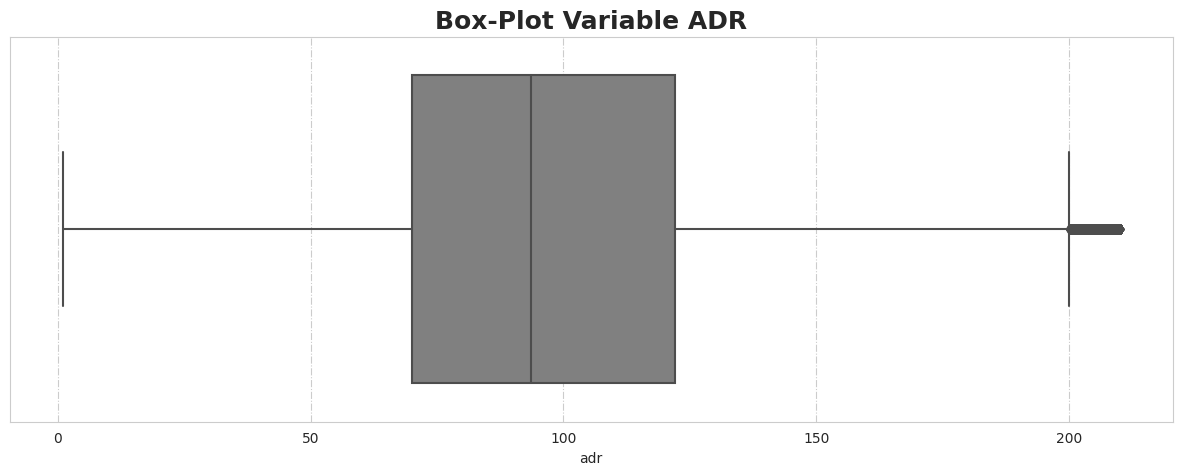

In [370]:
# gráfico bosplot de la variable "adr"
plt.subplots(figsize = (15,5))
sns.boxplot(data=df, x="adr",color="Grey")
plt.title("Box-Plot Variable ADR",fontweight = "bold", fontsize = 18)

Text(0, 0.5, 'monto')

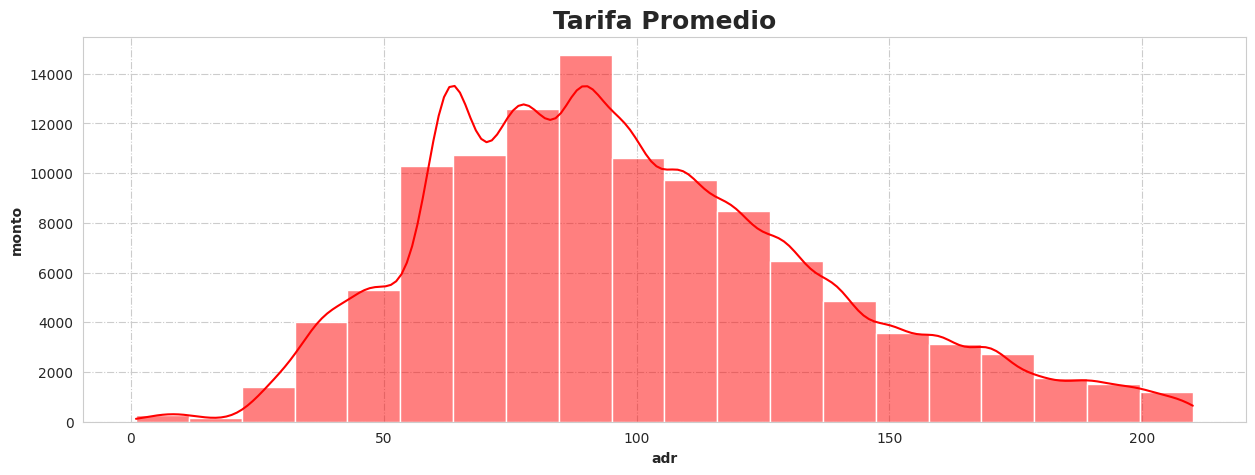

In [371]:
# tarifa promedio s/ hotel
plt.subplots(figsize = (15,5))

sns.histplot(data = df, x = "adr", bins = 20, kde = True , color = "red")

plt.title("Tarifa Promedio",fontweight = "bold", fontsize = 18)
plt.xlabel("adr",fontweight = "bold",fontsize = 10)
plt.ylabel("monto",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'monto')

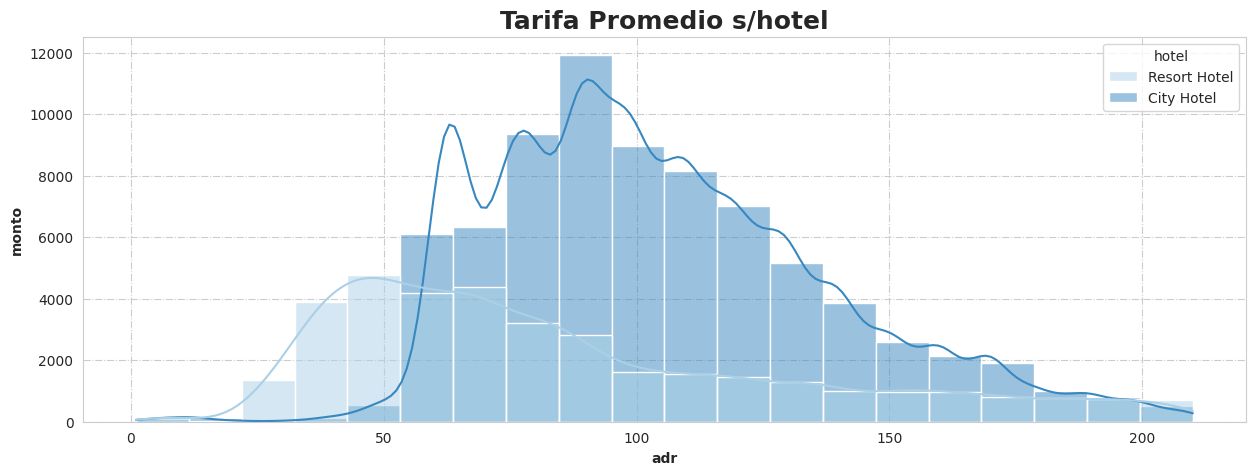

In [372]:
# tarifa promedio s/ hotel
plt.subplots(figsize = (15,5))

sns.histplot(data = df, x = "adr", hue= "hotel", bins = 20, kde = True , palette = "Blues")

plt.title("Tarifa Promedio s/hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("adr",fontweight = "bold",fontsize = 10)
plt.ylabel("monto",fontweight = "bold",fontsize = 10)

In [373]:
# valores estadísticos de la variable "adr"
df.adr.describe()

count    113506.000000
mean         98.625654
std          38.759972
min           1.000000
25%          70.000000
50%          93.600000
75%         122.000000
max         210.000000
Name: adr, dtype: float64

In [374]:
# tarifas promedio según el tipo de habitación
df_room = df[["adr","assigned_room_type"]].groupby(by=["assigned_room_type"])
df_room.mean("adr")

,adr
assigned_room_type,
A,93.002455
B,96.103308
C,98.792779
D,105.174229
E,109.273403
F,135.282807
G,132.659412
H,131.510554
I,78.010743


Text(0, 0.5, 'adr')

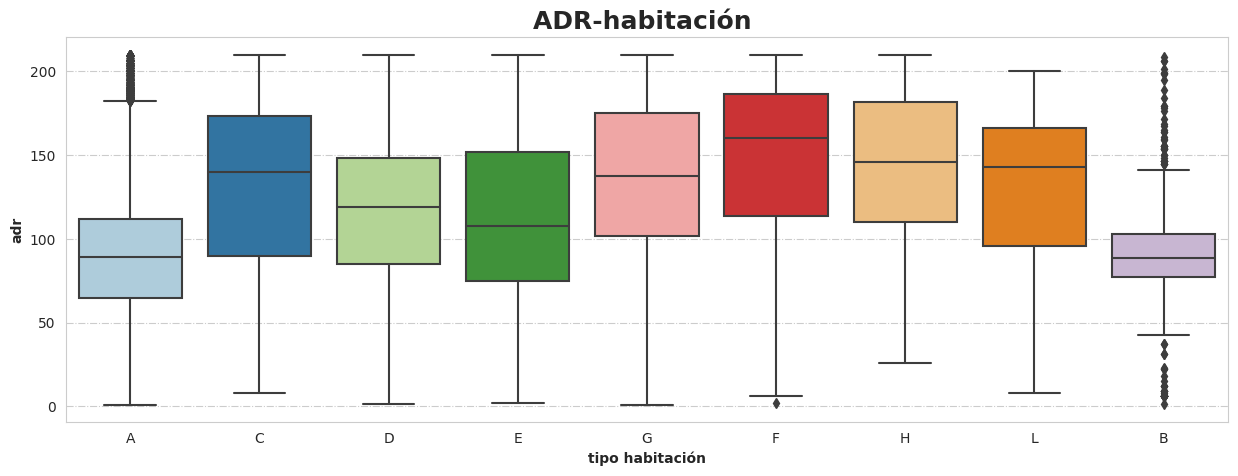

In [375]:
# gráfico boxplot de la variable "adr" según el tipo de habitación reservada ("reserved_room_type")
plt.subplots(figsize = (15,5))

sns.boxplot(data = df, x = "reserved_room_type", y = "adr", palette = sns.color_palette("Paired", 9))

plt.title("ADR-habitación ",fontweight = "bold", fontsize = 18)
plt.xlabel("tipo habitación",fontweight = "bold",fontsize = 10)
plt.ylabel("adr",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'adr')

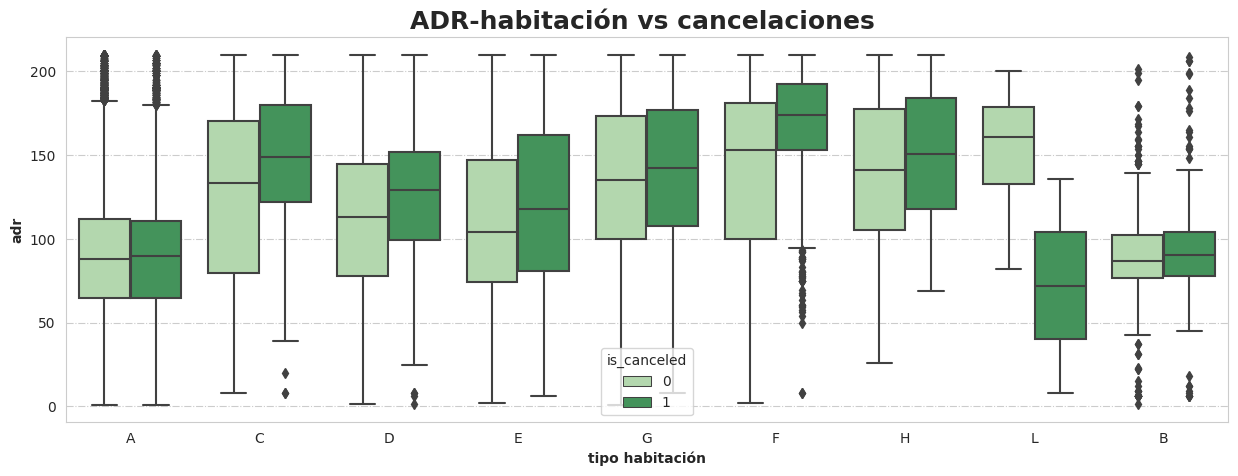

In [376]:
# variación de adr s/habitación y cancelaciones
plt.subplots(figsize = (15,5))

sns.boxplot(data = df, x = "reserved_room_type", y = "adr", hue="is_canceled",
            palette = sns.color_palette("Greens", 2))

plt.title("ADR-habitación vs cancelaciones ",fontweight = "bold", fontsize = 18)
plt.xlabel("tipo habitación",fontweight = "bold",fontsize = 10)
plt.ylabel("adr",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'adr')

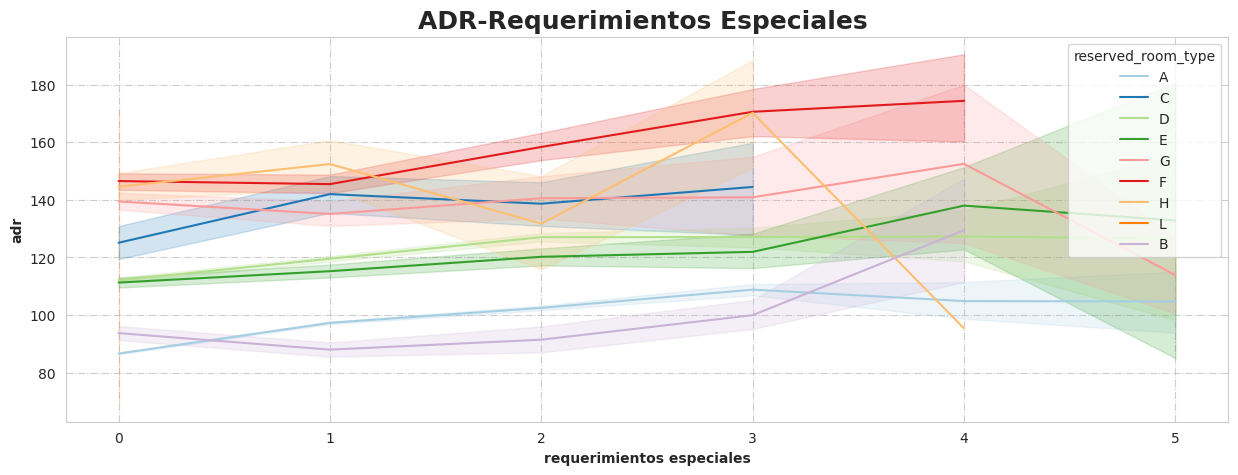

In [377]:
# gráfico de línea entre variables "total_of_special_requests" & "adr"
plt.subplots(figsize = (15,5))

sns.lineplot(data= df, x="total_of_special_requests", y= "adr",
             hue="reserved_room_type",palette = sns.color_palette("Paired", 9))

plt.title("ADR-Requerimientos Especiales ",fontweight = "bold", fontsize = 18)
plt.xlabel("requerimientos especiales",fontweight = "bold",fontsize = 10)
plt.ylabel("adr",fontweight = "bold",fontsize = 10)

<ipython-input-378-076c60ead8b9>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x="arrival_date_month", y= "adr",


Text(0, 0.5, 'adr')

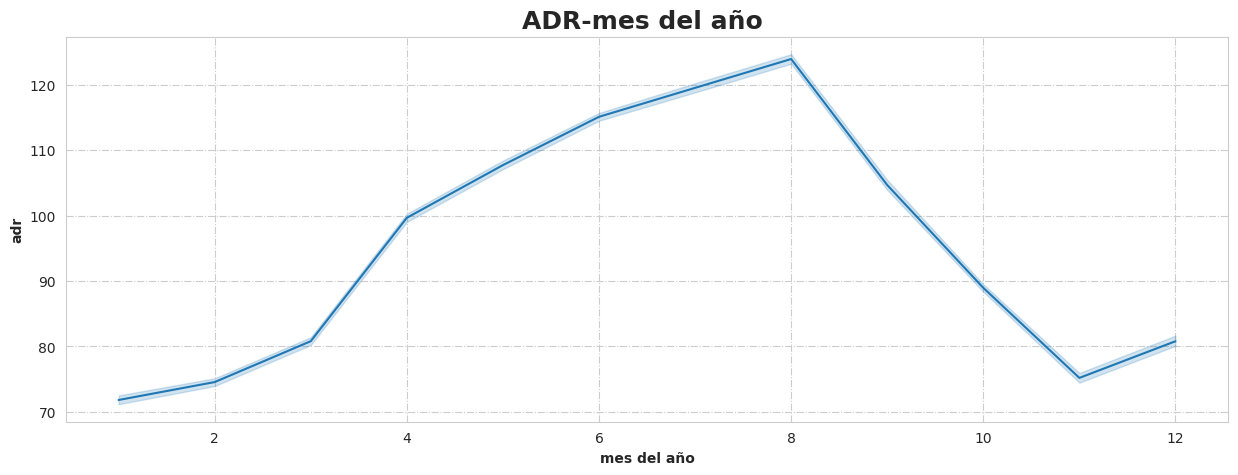

In [378]:
# gráfico de línea entre variables "arrival_date_month" & "adr"
plt.subplots(figsize = (15,5))

sns.lineplot(data=df, x="arrival_date_month", y= "adr",
             palette = sns.color_palette("Paired", 12))

plt.title("ADR-mes del año ",fontweight = "bold", fontsize = 18)
plt.xlabel("mes del año",fontweight = "bold",fontsize = 10)
plt.ylabel("adr",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'adr')

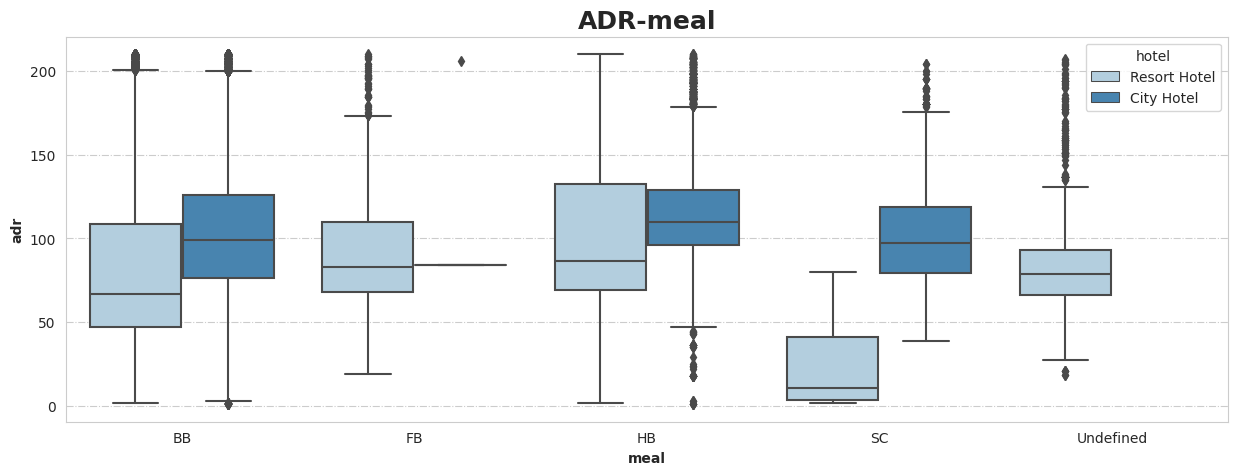

In [379]:
# variacion de la tarifa s/ tipo de comida
plt.subplots(figsize = (15,5))

sns.boxplot(data = df, x = "meal", y = "adr",hue= "hotel",
            palette = "Blues")

plt.title("ADR-meal",fontweight = "bold", fontsize = 18)
plt.xlabel("meal",fontweight = "bold",fontsize = 10)
plt.ylabel("adr",fontweight = "bold",fontsize = 10)

In [380]:
# % de tipo de forma de pago
df["deposit_type"].value_counts(normalize=True)

No Deposit    0.870377
Non Refund    0.128213
Refundable    0.001410
Name: deposit_type, dtype: float64

Text(0, 0.5, 'reservas')

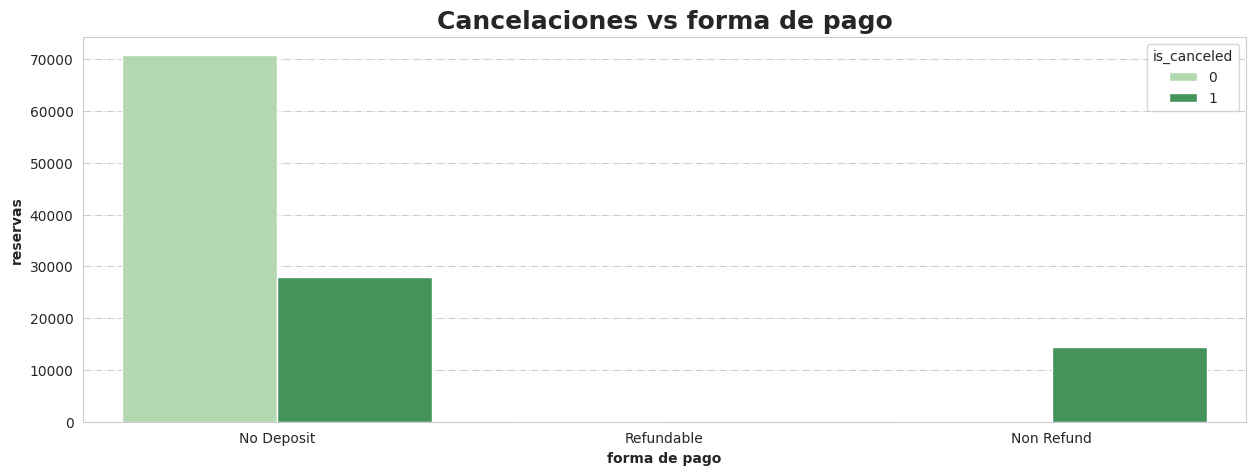

In [381]:
# comportamiento de cancelaciones s/ tipo de deposito
plt.subplots(figsize = (15,5))

sns.countplot(x="deposit_type", data=df, hue= "is_canceled",palette = sns.color_palette("Greens", 2))

plt.title("Cancelaciones vs forma de pago",fontweight = "bold", fontsize = 18)
plt.xlabel("forma de pago",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Con respecto a la tarifa, se observa que el City Hotel posee valores más elevados que el Resort Hotel lo cual podría explicar porque las estadías del mismo son menores.

**La habitación mas demandada es la A que se observa que es la de menor valor promedio.** Se ve que tiene varios outliers pero podrías significar la cantidad de requerimentos especiales que tenga la reserva en si.

Comparando el adr medio de las habitaciones con las cancelaciones, se concluye que no hay un patrón relacionable exceptuando **la habitación L sobre la cual varía mucho la tarifa media entre las reservas efectivas y canceladas.**

Como era de esperarse la cantidad de requerimientos especiales, aumenta el valor de la tarifa.

**En los meses de mayor demanda (Jul-Ago), las tarifas son más elevadas.**

En cuanto a la forma de pago, **el deposito No Reembosable posee mayor % de cancelaciones que de reservas efectivas.**

# **Data Engineering: Obtención de Insights**
En esta sección se resaltan las conclusiones más importantes del EDA.

El 60 % de los datos disponibles corresponden a reservas realizadas en el City Hotel, en promedio el 60-70 % de las reservas son efectivas.

El comportamiento de las cancelaciones no presentó un patron diferente a partir del tipo de hotel, es decir, sigue siendo un porcentaje proporcional a la cantidad de reservas en cada hotel.

[Text(0, 0, 'efectiva'), Text(1, 0, 'cancelada')]

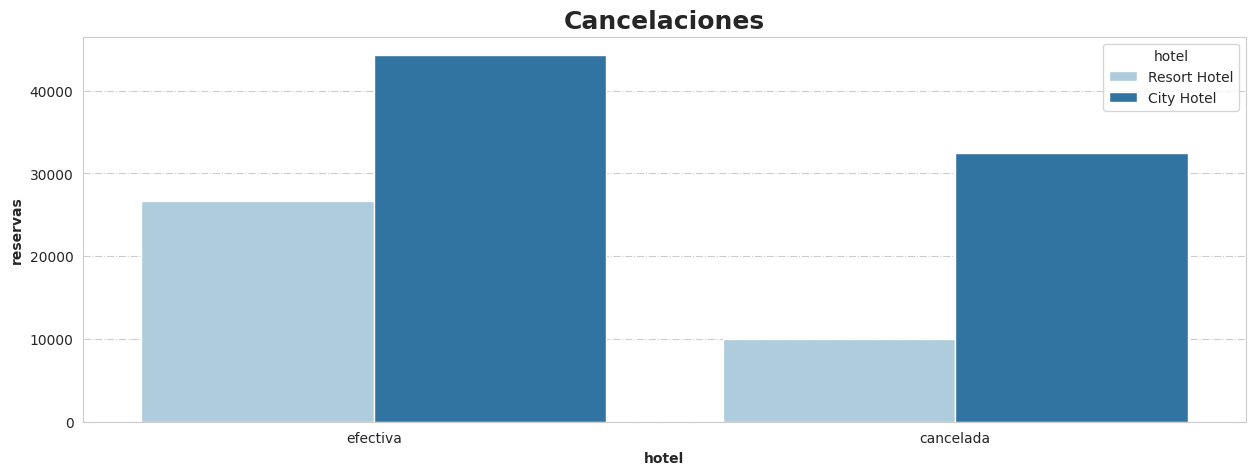

In [382]:
plt.subplots(figsize = (15,5))
a=sns.countplot (data=df, x="is_canceled", hue="hotel",palette = sns.color_palette("Paired", 3))
plt.title("Cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("hotel",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)
a.set_xticklabels(["efectiva","cancelada"])

El mes de mayor demanda de reservas es Agosto, mientras que el de menor demanda es Enero.

No tiene mucho valor analítico el año de la reserva ya que solo existen registros completos del año 2016.

En cuanto a los meses del año, el comportamiento de las cancelaciones sigue siendo el esperado según los datos generales.

Text(0, 0.5, 'reservas')

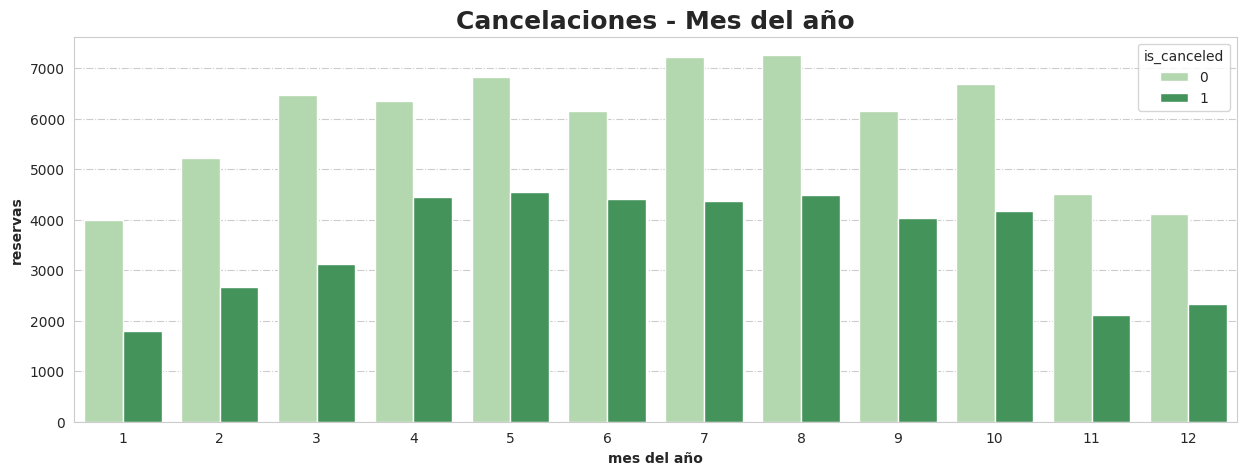

In [383]:
plt.subplots(figsize = (15,5))
sns.countplot (data=df, x= "arrival_date_month", hue="is_canceled", palette = sns.color_palette("Greens", 2))
plt.title("Cancelaciones - Mes del año",fontweight = "bold", fontsize = 18)
plt.xlabel("mes del año",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

La estadía promedio en ambos hoteles es de 3 días, pero en el City Hotel la estadía es menor que en el Resort Hotel.

En cuanto a la duración de las estadías en referencia a los meses del año, también se identifican variaciones según el tipo de hotel:

* City Hotel: El mes de estadías más largas es Diciembre y el de estadías más cortas es Octubre, mostrando un comportamiento uniforme a lo largo del año.

* Resort Hotel: El mes de estadías más largas es Junio y el de estadías más cortas es Enero, mostrando un comportamiento muy variante a lo largo del año.


Text(0, 0.5, 'reservas')

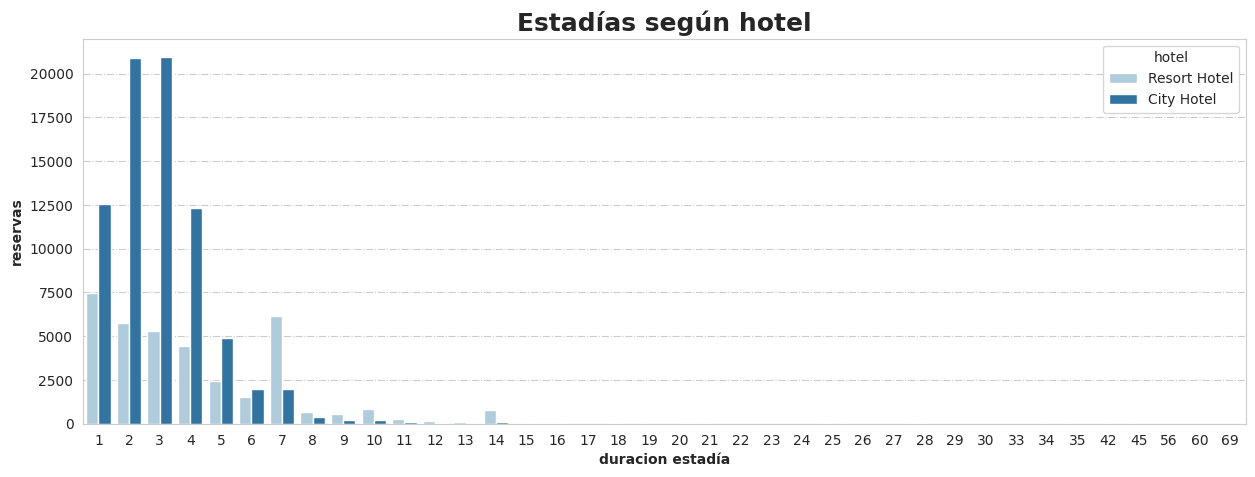

In [384]:
plt.subplots(figsize = (15,5))
sns.countplot(x="stays", data=df, hue="hotel", palette = sns.color_palette("Paired", 2))
plt.title("Estadías según hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("duracion estadía",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'duracion estadías')

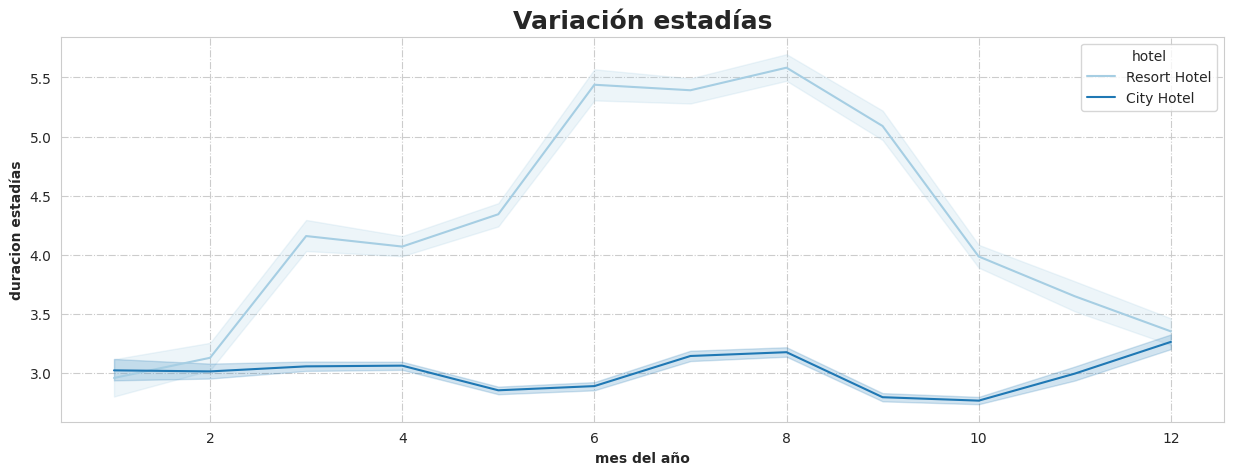

In [385]:
plt.subplots(figsize = (15,5))
sns.lineplot(data=df, x="arrival_date_month", y= "stays", hue="hotel", palette = sns.color_palette("Paired", 2))
plt.title("Variación estadías",fontweight = "bold", fontsize = 18)
plt.xlabel("mes del año",fontweight = "bold",fontsize = 10)
plt.ylabel("duracion estadías",fontweight = "bold",fontsize = 10)

En cuanto al tipo de clientes, en ambos hoteles, el mayor porcentaje corresponde al tipo Transient. Se entiende que son clientes que vacacionan de manera independiente normal, es decir sin un grupo ni un contrato predefinido.

Y el 90 % de las reservas son sólo de adultos en parejas por lo que se estima que son hoteles con un entorno poco familiar.

Text(0, 0.5, 'reservas')

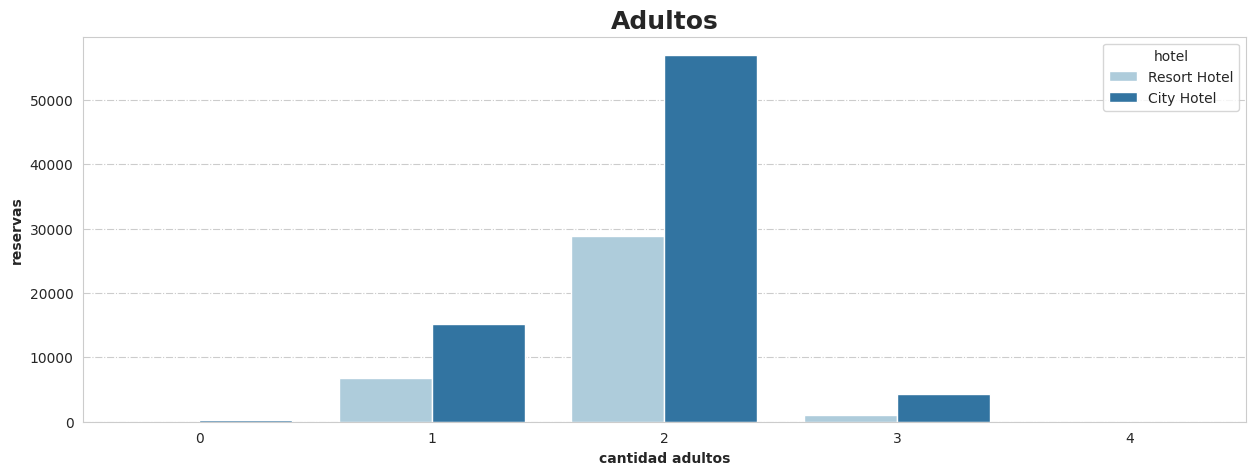

In [386]:
plt.subplots(figsize = (15,5))
sns.countplot(x="adults", data=df, hue= "hotel",palette = sns.color_palette("Paired", 2))
plt.title("Adultos",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad adultos",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

A su vez, el hotel posee una clientela mayormente internacional y se observó que el comportamiento de las cancelaciones cambia con respecto a las localidades internacionales.

Lo mismo ocurre con los viajes grupales.


Text(0, 0.5, 'reservas')

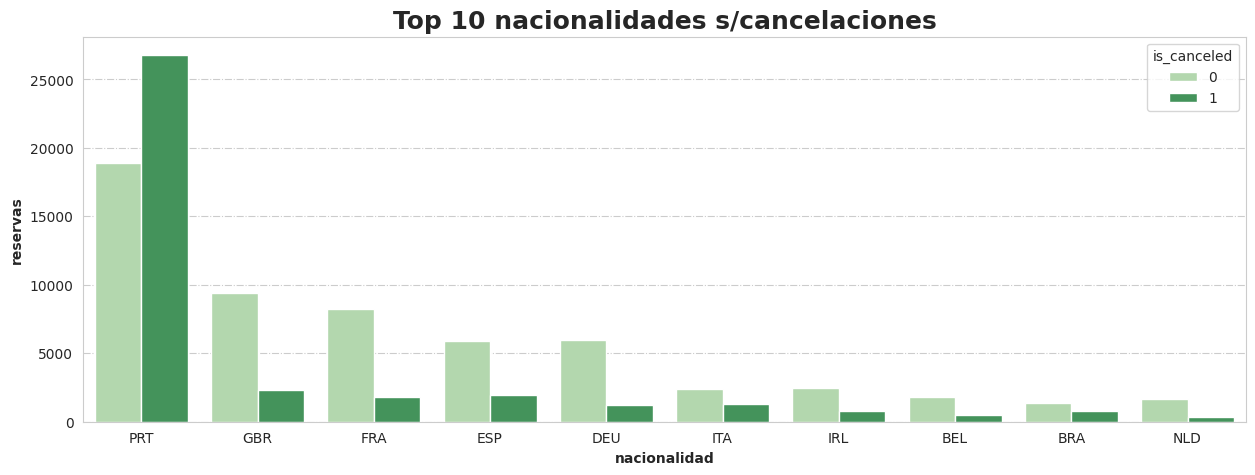

In [387]:
plt.subplots(figsize = (15,5))
sns.countplot(data=df, x="country",
              order=pd.value_counts(df['country']).iloc[:10].index, hue= "is_canceled",
              palette = sns.color_palette("Greens", 2))
plt.title("Top 10 nacionalidades s/cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("nacionalidad",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Text(0, 0.5, 'reservas')

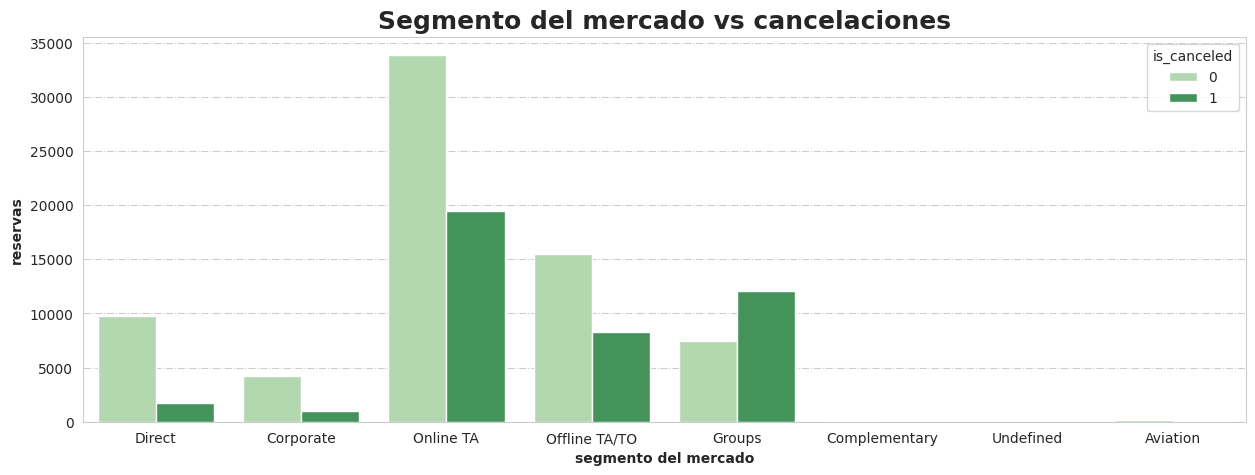

In [388]:
plt.subplots(figsize = (15,5))
sns.countplot(x="market_segment", data=df, hue= "is_canceled", palette = sns.color_palette("Greens", 2))
plt.title("Segmento del mercado vs cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("segmento del mercado",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

Además, se infiere que si la reserva posee requerimientos especiales o pedido de lugares de cochera, el % de cancelaciones baja en relación al total.

Text(0, 0.5, 'reservas')

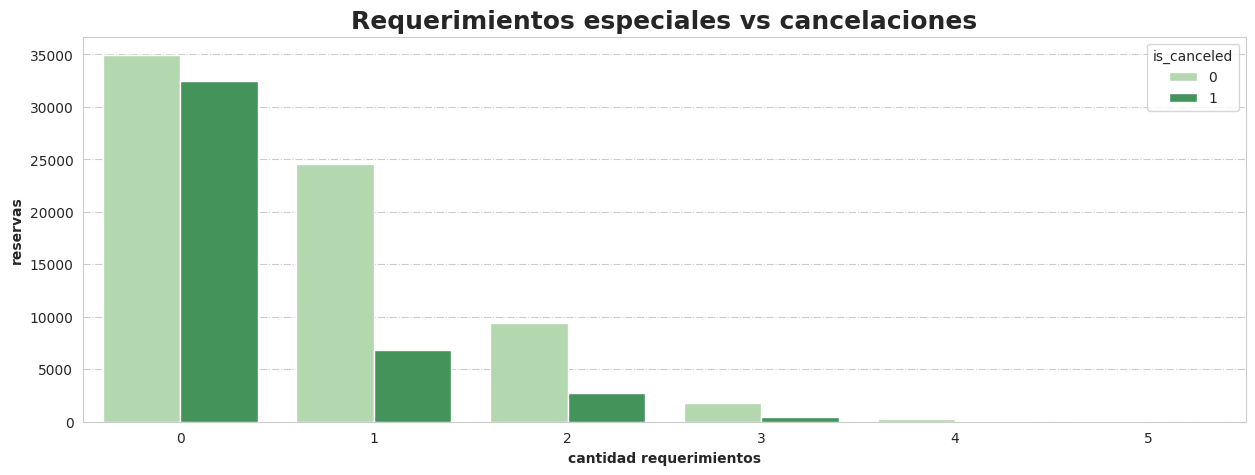

In [389]:
plt.subplots(figsize = (15,5))
sns.countplot(x="total_of_special_requests", data=df, hue= "is_canceled", palette = sns.color_palette("Greens", 2))
plt.title("Requerimientos especiales vs cancelaciones",fontweight = "bold", fontsize = 18)
plt.xlabel("cantidad requerimientos",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

El tiempo transcurrido entre la solicitud de la reserva y el arribo al hotel, demostro poseer una leve correlación lineal con las cancelaciones.

Text(0, 0.5, 'reservas')

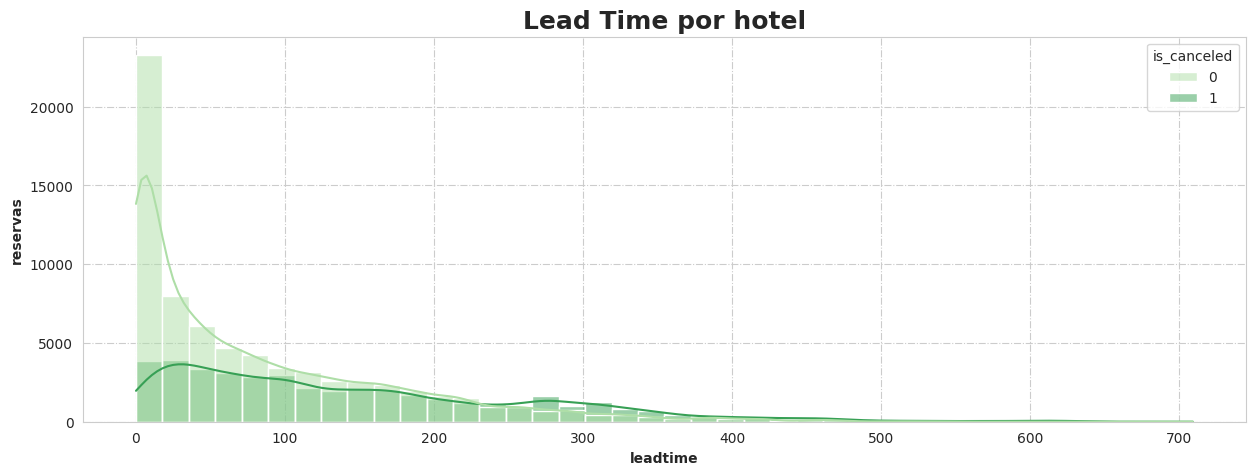

In [390]:
plt.subplots(figsize = (15,5))
sns.histplot(data = df, x = "lead_time", hue ="is_canceled", bins = 40, kde = True, palette = "Greens")
plt.title("Lead Time por hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("leadtime",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

También se observo que la mayoria de las reservas corresponden a clientes nuevos y no repetidos.

[Text(0, 0, 'nuevo'), Text(1, 0, 'no nuevo')]

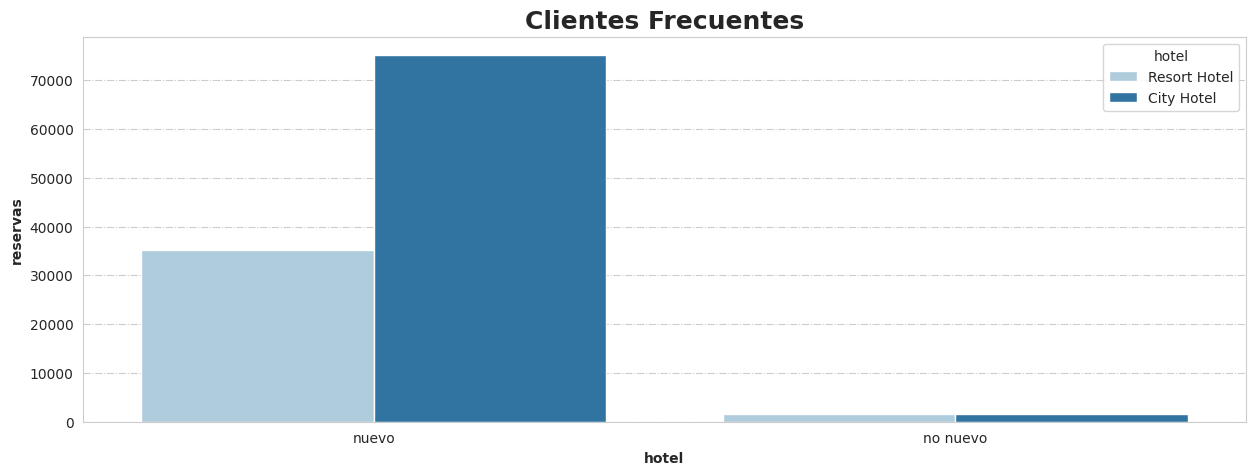

In [391]:
plt.subplots(figsize = (15,5))
g = sns.countplot (data =  df, x = "is_repeated_guest", hue = "hotel",palette = sns.color_palette("Paired", 2))
plt.title("Clientes Frecuentes",fontweight = "bold", fontsize = 18)
plt.xlabel("hotel",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)
g.set_xticklabels(["nuevo","no nuevo"])


El hotel tiene en general poca espera de la confirmación de la reserva y casi el 90 % de los casos se asigna la habitación que fue reservada por el cliente.

In [392]:
comparacion.value_counts(normalize = True)

result                               
No hay cambio de habitacion reservada    0.877777
Cambio de habitacion reservada           0.122223
dtype: float64

Las tarifas promedio varian según el tipo de hotel. En City hotel el promedio es de 100 usd mientras que en Resort hotel está en 50 usd.


Text(0, 0.5, 'monto')

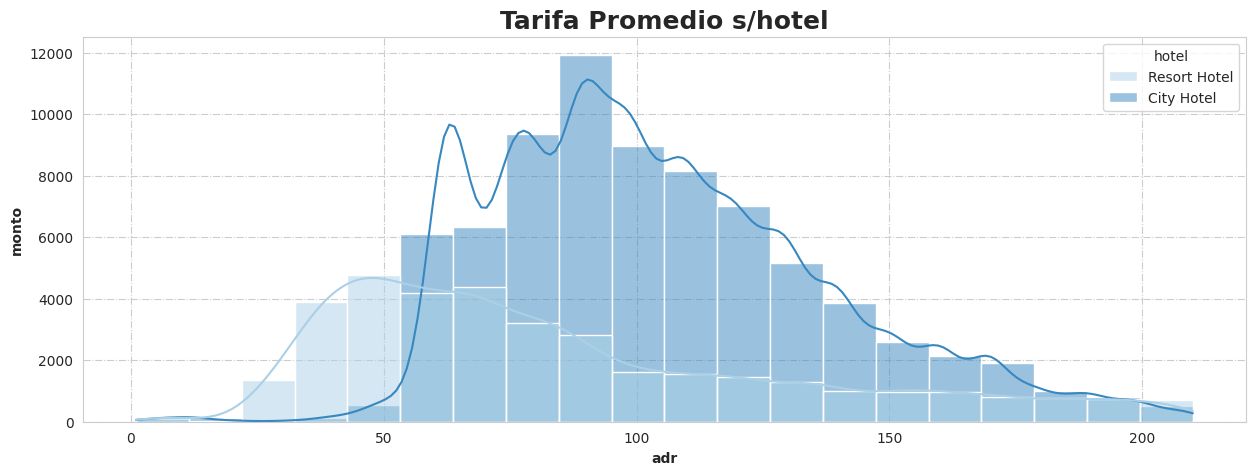

In [393]:
plt.subplots(figsize = (15,5))
sns.histplot(data = df, x = "adr", hue= "hotel", bins = 20, kde = True , palette = "Blues")
plt.title("Tarifa Promedio s/hotel",fontweight = "bold", fontsize = 18)
plt.xlabel("adr",fontweight = "bold",fontsize = 10)
plt.ylabel("monto",fontweight = "bold",fontsize = 10)

La habitacion más economica es la A y a su vez la más demandada, además posee muchos valores fuera del rango promedio pero eso se debe a los requerimientos especiales realizados sobre las mismas.

La habitación L es una de las más caras y posee un patron diferente con las cancelaciones, lo que infiere a que si el cliente paga más caro es probable que no anule la reserva.


Text(0, 0.5, 'adr')

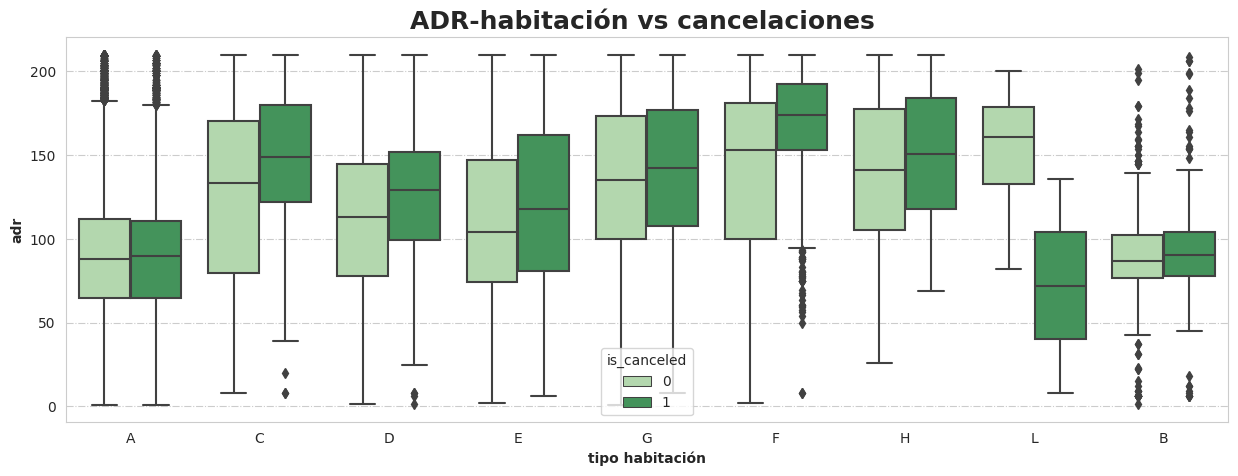

In [394]:
plt.subplots(figsize = (15,5))
sns.boxplot(data = df, x = "reserved_room_type", y = "adr", hue="is_canceled",
            palette = sns.color_palette("Greens", 2))
plt.title("ADR-habitación vs cancelaciones ",fontweight = "bold", fontsize = 18)
plt.xlabel("tipo habitación",fontweight = "bold",fontsize = 10)
plt.ylabel("adr",fontweight = "bold",fontsize = 10)

Según la forma de pago, cuando no es reembolsable la reserva existe un cambio en el patron de las reservas; siendo mayor el % de cancelaciones.

Text(0, 0.5, 'reservas')

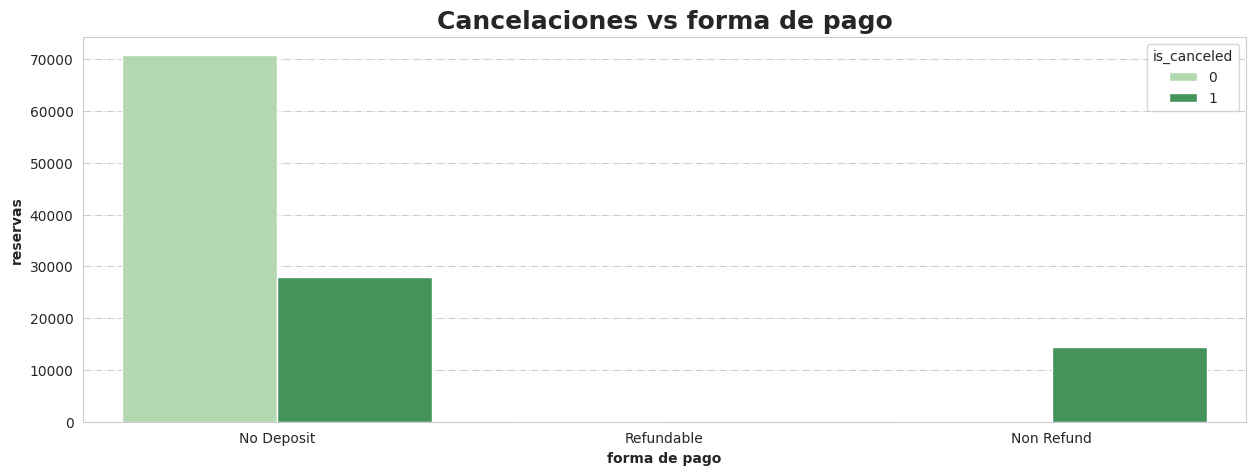

In [395]:
plt.subplots(figsize = (15,5))
sns.countplot(x="deposit_type", data=df, hue= "is_canceled",palette = sns.color_palette("Greens", 2))
plt.title("Cancelaciones vs forma de pago",fontweight = "bold", fontsize = 18)
plt.xlabel("forma de pago",fontweight = "bold",fontsize = 10)
plt.ylabel("reservas",fontweight = "bold",fontsize = 10)

**A partir de las principales conclusiones del EDA, se seleccionan las variables a considerar para el modelado.**

# **Feature Seleccion**

Se selecionarán todas las variables menos las que se indican a continuación, ya que a partir del EDA se asume que no aportan información:

*   arrival_date_XXX: sólo se deja arrival date month
*   stays_in_weekend_nights & stays_in_week_nights: se reemplaza con variable stays
*   children & babies: se reemplaza por variable Kids
*   country: se simplica la variable entre nacionales e internacionales
*   previous_cancellations & previous_bookings_not_canceled: no aportan información como se vió en el EDA
*   reserved_room_type: se reemplaza por assigned como se vió en el EDA
*   reservation_status & reservation_status_date: no aporta info

Para continuar con el estudio, se generará un nuevo df para el modelado con las variables mencionadas.

**Para la definición de los modelos, se tendrá en consideración el hecho que el set de datos no se encuentra balanceado: presenta un 40 % de cancelaciones y un 60 % de reservas efectivas.**

In [396]:
# generación de df para modelado
df_model = df.drop(columns =["arrival_date_year","arrival_date_week_number","arrival_date_day_of_month",
                              "stays_in_weekend_nights","stays_in_week_nights","children","babies",
                             "is_repeated_guest", "previous_cancellations","agent",
       "previous_bookings_not_canceled","reserved_room_type","reservation_status", "reservation_status_date"])

In [397]:
# simplificacion de variable country: nacional/internacional
df_model["country"]=df_model["country"].apply(lambda x: "National" if x=="PRT" else "International")

In [398]:
# se verifican duplicados en el nuevo df
df_model.duplicated().value_counts()

False    79691
True     33815
dtype: int64

In [399]:
# se eliminan duplicados
df_model = df_model.drop_duplicates()

In [400]:
# tamaño dataframe
df_model.shape

(79691, 19)

In [401]:
# información de las variables
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79691 entries, 2 to 119389
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        79691 non-null  object 
 1   is_canceled                  79691 non-null  int64  
 2   lead_time                    79691 non-null  int64  
 3   arrival_date_month           79691 non-null  int64  
 4   adults                       79691 non-null  int64  
 5   meal                         79691 non-null  object 
 6   country                      79691 non-null  object 
 7   market_segment               79691 non-null  object 
 8   distribution_channel         79691 non-null  object 
 9   assigned_room_type           79691 non-null  object 
 10  booking_changes              79691 non-null  int64  
 11  deposit_type                 79691 non-null  object 
 12  days_in_waiting_list         79691 non-null  int64  
 13  customer_type  

In [402]:
df_model.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'adults',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'stays',
       'kids'],
      dtype='object')

In [403]:
# variables numericas
num_col=[column for column in df_model.columns if (df_model[column].dtype=='int64') | (df_model[column].dtype=='float64')]
num_col

['is_canceled',
 'lead_time',
 'arrival_date_month',
 'adults',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'stays',
 'kids']

In [404]:
# variables categóricas
cat_col=[column for column in df_model.columns if (df_model[column].dtype=='object')]
cat_col

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

## **Variables Categoricas**
Se aplica un Label Encoded sobre todas las variables categoricas.

In [405]:
# importación libreria
from sklearn import preprocessing

In [406]:
le = preprocessing.LabelEncoder()

In [407]:
# label sobre variables categóricas
for feature in cat_col:
  df_model[feature] = le.fit_transform(df_model[feature])

## **Variables Numéricas**
Para las variables numericas, se verificaran las correlaciones y las distribuciones de las mismas para determinar cual método se usará: StandarScaler o MinMaxScaler

In [408]:
df_num = df_model[['is_canceled',
 'lead_time',
 'arrival_date_month',
 'adults',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'stays',
 'kids']]

Text(0.5, 1.0, 'Correlacion entre variables')

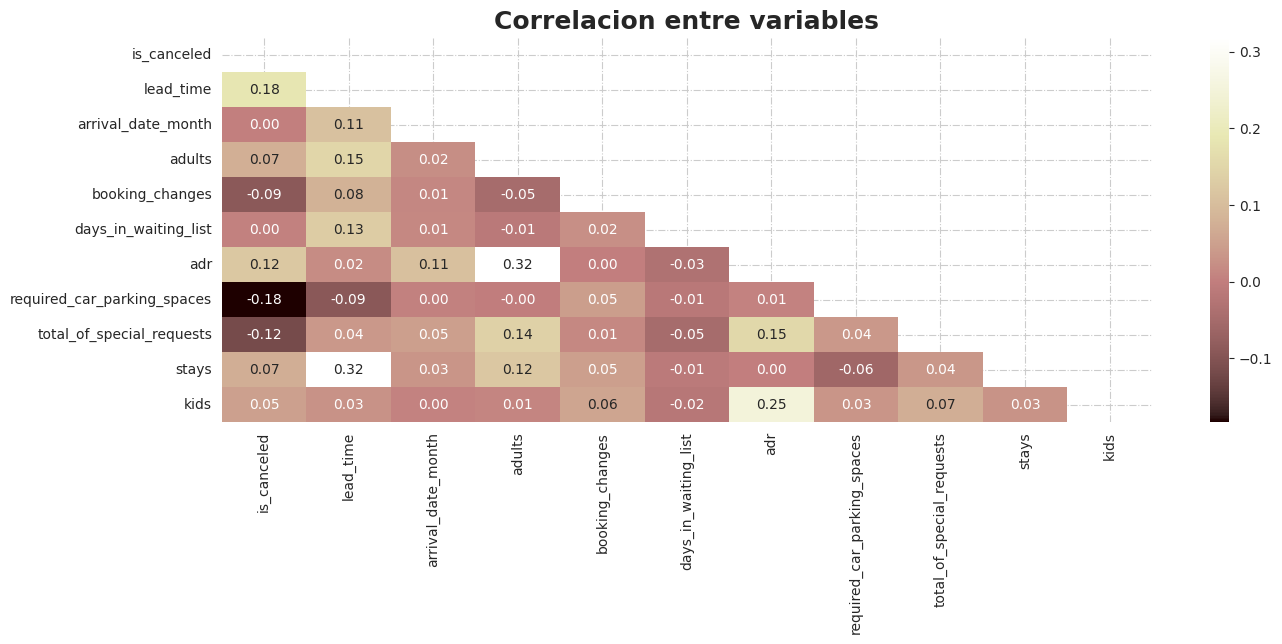

In [409]:
# correlacion con las cancelaciones
upp_mat2 = np.triu(df_num.corr())

plt.subplots(figsize = (15,5))

sns.heatmap(df_num.corr(),mask = upp_mat2 ,annot = True, fmt=".2f", cmap="pink")

plt.title("Correlacion entre variables", fontweight = "bold", fontsize = 18)

In [410]:
df_num.describe()

,is_canceled,lead_time,arrival_date_month,adults,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,stays,kids
count,79691.000000,79691.000000,79691.000000,79691.000000,79691.000000,79691.000000,79691.000000,79691.000000,79691.000000,79691.000000,79691.000000
mean,0.276016,81.312356,6.436323,1.875983,0.263066,0.742204,102.753217,0.083134,0.700794,3.673125,0.124707
std,0.447028,86.134023,3.123861,0.494484,0.701477,10.049385,41.119936,0.280102,0.826783,2.739019,0.424773
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,12.000000,4.000000,2.000000,0.000000,0.000000,73.330000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,51.000000,7.000000,2.000000,0.000000,0.000000,97.580000,0.000000,1.000000,3.000000,0.000000
75%,1.000000,127.000000,9.000000,2.000000,0.000000,0.000000,130.000000,0.000000,1.000000,5.000000,0.000000
max,1.000000,709.000000,12.000000,4.000000,18.000000,391.000000,210.000000,8.000000,5.000000,69.000000,10.000000


In [411]:
df_model.shape

(79691, 19)

**Se identifican pocas correlaciones lineales y en general las distribuciones de las variables no tienen un comportamiento normal; por ello se decide aplica MinMaxScaler**

El mismo se aplicará sobre todo el df_model, incluyendo las variables categóricas con su label.

In [412]:
# importacion de libreria
from sklearn.preprocessing import MinMaxScaler

In [413]:
scaler = MinMaxScaler()

In [414]:
# entrenamiento y tranformación del df completo
model = scaler.fit_transform(df_model)

In [415]:
# re-generacion del df
model_ = pd.DataFrame(model)
model_.columns = df_model.columns

In [416]:
model_.head()

,hotel,is_canceled,lead_time,arrival_date_month,adults,meal,country,market_segment,distribution_channel,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,stays,kids
0,1.0,0.0,0.009873,0.545455,0.25,0.00,0.0,0.428571,0.25,0.2,0.0,0.0,0.0,0.666667,0.354067,0.0,0.0,0.000000,0.0
1,1.0,0.0,0.018336,0.545455,0.25,0.00,0.0,0.285714,0.00,0.0,0.0,0.0,0.0,0.666667,0.354067,0.0,0.0,0.000000,0.0
2,1.0,0.0,0.019746,0.545455,0.50,0.00,0.0,0.857143,0.75,0.0,0.0,0.0,0.0,0.666667,0.464115,0.0,0.2,0.014706,0.0
3,1.0,0.0,0.000000,0.545455,0.50,0.00,1.0,0.428571,0.25,0.2,0.0,0.0,0.0,0.666667,0.507177,0.0,0.0,0.014706,0.0
4,1.0,0.0,0.012694,0.545455,0.50,0.25,1.0,0.428571,0.25,0.2,0.0,0.0,0.0,0.666667,0.488038,0.0,0.2,0.014706,0.0


Text(0.5, 1.0, 'Correlacion entre variables')

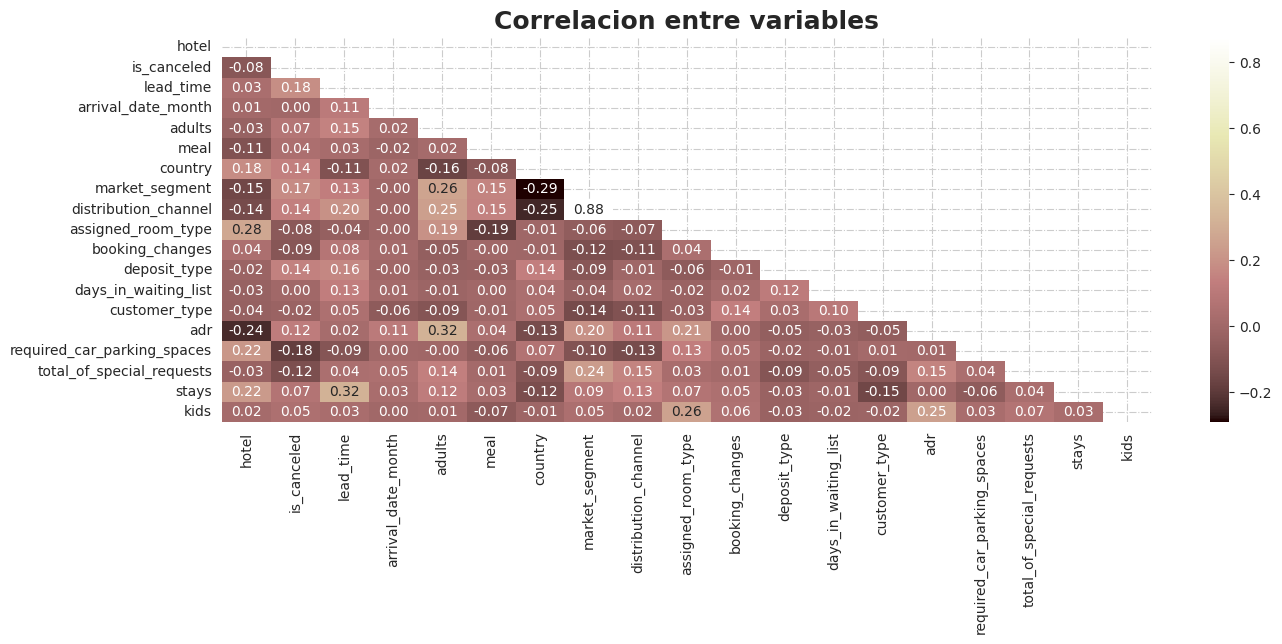

In [417]:
upp_mat3 = np.triu(model_.corr())

plt.subplots(figsize = (15,5))

sns.heatmap(model_.corr(),mask = upp_mat3 ,annot = True, fmt=".2f", cmap="pink")

plt.title("Correlacion entre variables", fontweight = "bold", fontsize = 18)

In [418]:
# verificacion de nulos
model_.isna().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_month             0
adults                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
stays                          0
kids                           0
dtype: int64

# **Aplicación de Modelos de ML de Clasificación**
En esta seccion aplicarán modelos de machine learning supervisados de clasificación.

La variable de salida será "is_canceled" con la finalidad de poder anticipar si una reserva será cancelada o efectiva.

Los modelos que se aplicarán son:
1. Arbol de Decisión
2. Regresión Logistica
3. Vecinos más cercanos: KNN


In [419]:
# importación librerias
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Para evaluar el rendimiento de los modelos, se calculará el Accuracy, Precision, Recall y F1-Score; visualizando la Matrix de Confusión.

**Se pondrá especial atención a la métrica de f1-score en las predicciones de la clase 1: Cancelaciones.**

In [420]:
#importación librerías
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [421]:
# función de rendimiento para los modelos
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    labels = ["Efectiva","Cancelada"]
    print("Classification Report (Test Set):")
    print(classification_report(ytest, pred, target_names=labels))
    print("")
    print("")
    plt.subplots(figsize = (2,2))
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.0%',cmap="Blues")
    plt.title("Matrix Confusión",fontweight = "bold", fontsize = 10)

## **Variables X & y**

In [422]:
# variables entrada X
X = model_.drop(columns="is_canceled")

In [423]:
# variable salida y: is_canceled
y = model_["is_canceled"]

In [424]:
# división de muestreos de entrenamiento y testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## **Árbol de Decisión**
Se utilizarán los parámetros seteados por defecto, junto con la profundidad del árbol.

In [425]:
# algoritmo DT, entrenamiento y prediccón
DT = DecisionTreeClassifier()

DT.fit(X_train,y_train)

y_pred_dt = DT.predict(X_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.84      0.84      0.84     17218
   Cancelada       0.58      0.57      0.58      6690

    accuracy                           0.76     23908
   macro avg       0.71      0.71      0.71     23908
weighted avg       0.76      0.76      0.76     23908





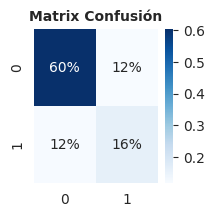

In [426]:
# rendimiento modelo DT
eval_classification(DT, y_pred_dt, X_train, y_train, X_test, y_test)

Se realizará una nueva prueba, utilizando los parámetros seteados por defecto, **menos class_weight que será balanced** con la intención de balancear el set de datos.

In [427]:
DT_balanced = DecisionTreeClassifier(class_weight = "balanced")

DT_balanced.fit(X_train,y_train)

y_pred_dt_balanced = DT_balanced.predict(X_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.83      0.84      0.84     17218
   Cancelada       0.58      0.57      0.58      6690

    accuracy                           0.76     23908
   macro avg       0.71      0.70      0.71     23908
weighted avg       0.76      0.76      0.76     23908





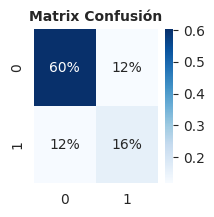

In [428]:
eval_classification(DT_balanced, y_pred_dt_balanced, X_train, y_train, X_test, y_test)

**No se obtiene mucha diferencia entre ambos modelos. Con un accuracy de 76 % a nivel general y un f1-score de predicciones de cancelaciones de 57-58 %.**

## **Regresión Logistica**
Se correrá el modelo con los parámetros seteados por defecto.

In [429]:
# algoritmo LR, entrenamiento y prediccón
LR = LogisticRegression()

LR.fit(X_train,y_train)

y_pred_lr = LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.78      0.93      0.85     17218
   Cancelada       0.64      0.35      0.45      6690

    accuracy                           0.76     23908
   macro avg       0.71      0.64      0.65     23908
weighted avg       0.75      0.76      0.74     23908





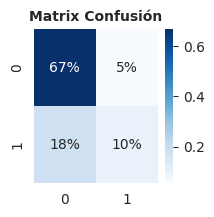

In [430]:
# rendimiento modelo LR
eval_classification(LR, y_pred_lr, X_train, y_train, X_test, y_test)

Se determina un máximo de iteraciones de 1000, al igual que el DT se balancea el peso de las clases y se utiliza el parámetro ovr por tratarse de una clasificación binaria.

In [431]:
LR_balanced = LogisticRegression(max_iter=1000, class_weight = "balanced", multi_class= "ovr")

LR_balanced.fit(X_train,y_train)

y_pred_lr_balanced = LR_balanced.predict(X_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.88      0.70      0.78     17218
   Cancelada       0.50      0.75      0.60      6690

    accuracy                           0.72     23908
   macro avg       0.69      0.73      0.69     23908
weighted avg       0.77      0.72      0.73     23908





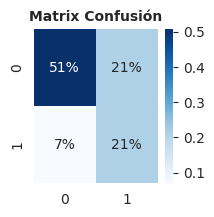

In [432]:
eval_classification(LR_balanced, y_pred_lr_balanced, X_train, y_train, X_test, y_test)

**En este modelo si se detecta un impacto de mejora en la consideración del peso de las clases. Aquí el accuracy general es de 72 % con un f1-score de cancelaciones de 60 %.**

## **KNN**
En primer lugar se corre el modelo con los parámetros seteados por defecto.

In [433]:
# algoritmo nei, entrenamiento y prediccón
nei = KNeighborsClassifier()

nei.fit(X_train,y_train)

y_pred_nei = nei.predict(X_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.84      0.87      0.85     17218
   Cancelada       0.63      0.58      0.60      6690

    accuracy                           0.79     23908
   macro avg       0.74      0.72      0.73     23908
weighted avg       0.78      0.79      0.78     23908





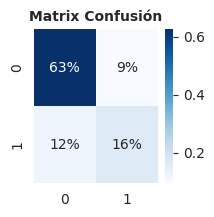

In [434]:
# rendimiento modelo nei
eval_classification(nei, y_pred_nei, X_train, y_train, X_test, y_test)

Se correrá nuevamente el modelo ampliando el número de vecinos cercanos a 10, aleatoriamente.

In [435]:
nei_10 = KNeighborsClassifier(n_neighbors = 10)

nei_10.fit(X_train,y_train)

y_pred_nei_10 = nei_10.predict(X_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.82      0.91      0.86     17218
   Cancelada       0.68      0.50      0.58      6690

    accuracy                           0.79     23908
   macro avg       0.75      0.70      0.72     23908
weighted avg       0.78      0.79      0.78     23908





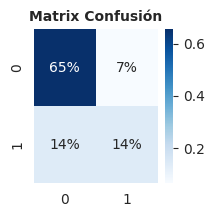

In [436]:
eval_classification(nei_10, y_pred_nei_10, X_train, y_train, X_test, y_test)

Las métricas dadas por estos modelos de KNN son bastante similares; indicando un accuracy de 79 % con 58-60 % de f1-score en cancelaciones.

## **Conclusiones**

Como se planteó al inicio del proyecto, el problema de negocio son las cancelaciones de las reservas. Por ello, el mejor modelo que resulté será aquel que pueda predecir la mayor cantidad de reservas que sean canceladas.

En esta sección, a partir de las métricas de los primeros modelos; se puso en evidencia el problema detectado en el EDA: el set de datos no se encuentra balanceado ya que de todas las reservas disponibles sólo el 37 % son canceladas.

A partir de dicho planteo es que se descartó la métrica de accuracy como un valor analizable y se realizó el enfoque de los rendimientos a partir del f1-score considerando así el precision y recall en las predicciones de las cancelaciones.

Se probaron en total 6 modelos, en principio sin seteo de parámetros y luego apuntando a dar pesos equivalentes a las clases disponibles.

Los conclusiones principales son las siguientes:

* Decision Tree

Los modelos analizados poseen valores cercanos entre Precision y Recall a 60 %. Lo que indicaría que tiene un buen comportamiento en la prediccion de cancelaciones; pero es muy bajo el porcentaje en sí.


*  Logistic Regression

En estos modelos, se verificó como impacta el peso de las clases ya que en ambos modelos aparece una variacion evidente entre Precision y Recall. El modelo balanceado, aumenta ampliamente el recall pero baja la precision demostrando no ser el modelo mas adecuado ya que posee un porcentaje de Falsos Negativos muy alto.

*  KNN

En estos modelos, posee un comportamiento apto en ambos casos (n_nei = 5 y 10). El f1-score es de 60 % con mejor precision que recall. Lo cual indica que es un buen modelo ya que es menor el % de falsos negativos.

De los 6 modelos aplicados; se validarán unicamente 2 que demostraron un buen rendimiento:
1. Decision Tree Balanced
2. KNN n_nei = 10

# **Validación de modelos de ML de Clasificación seleccionados**

Se verificarán las métricas de rendimiento en los dos modelos seleccionados: Decision Tree Balanced y KNN=10

## **Validación Simple**
En esta sección se busca analizar las métricas de rendimiendo del modelo con el muestreo de train y test seleccionado en la sección Variables X & y.


In [437]:
# funcion para validacion sobre train
def eval_classification_train(model, pred, xtrain, ytrain, xtest, ytest):
    labels = ["Efectiva","Cancelada"]
    print("Classification Report (Train Set):")
    print(classification_report(ytrain, pred, target_names=labels))
    print("")
    print("")
    plt.subplots(figsize = (2,2))
    cm = confusion_matrix(y_train, pred)
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.0%',cmap="pink", xticklabels=True, yticklabels=True)
    plt.title("Matrix Confusión",fontweight = "bold", fontsize = 10)

**Decision Tree Balanced**

In [438]:
# predicción train con modelo DT_balanced
y_pred_dt_train = DT_balanced.predict(X_train)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.83      0.84      0.84     17218
   Cancelada       0.58      0.57      0.58      6690

    accuracy                           0.76     23908
   macro avg       0.71      0.70      0.71     23908
weighted avg       0.76      0.76      0.76     23908





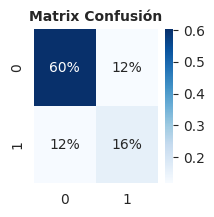

In [439]:
# evalación modelo DT_balanced test
eval_classification(DT_balanced, y_pred_dt_balanced, X_train, y_train, X_test, y_test)

Classification Report (Train Set):
              precision    recall  f1-score   support

    Efectiva       1.00      0.99      1.00     40477
   Cancelada       0.98      1.00      0.99     15306

    accuracy                           1.00     55783
   macro avg       0.99      1.00      0.99     55783
weighted avg       1.00      1.00      1.00     55783





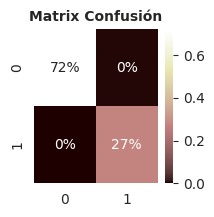

In [440]:
# evalación modelo DT_balanced train
eval_classification_train(DT_balanced, y_pred_dt_train, X_train, y_train, X_test, y_test)

**KNN con 10 vecinos**

In [441]:
# predicción train con modelo nei_10
y_pred_nei_train = nei_10.predict(X_train)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.82      0.91      0.86     17218
   Cancelada       0.68      0.50      0.58      6690

    accuracy                           0.79     23908
   macro avg       0.75      0.70      0.72     23908
weighted avg       0.78      0.79      0.78     23908





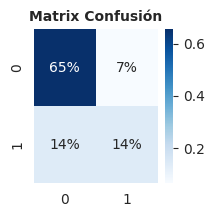

In [442]:
# evalación modelo nei_10 test
eval_classification(nei_10, y_pred_nei_10, X_train, y_train, X_test, y_test)

Classification Report (Train Set):
              precision    recall  f1-score   support

    Efectiva       0.85      0.93      0.89     40477
   Cancelada       0.76      0.57      0.65     15306

    accuracy                           0.83     55783
   macro avg       0.81      0.75      0.77     55783
weighted avg       0.83      0.83      0.82     55783





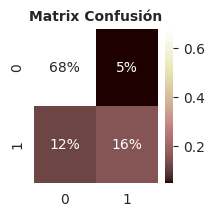

In [443]:
# evalación modelo nei_10 train
eval_classification_train(nei_10, y_pred_nei_train, X_train, y_train, X_test, y_test)

A partir de la validación simple, se detecta que ambos modelos se encuentran en **overfitting**.

Resumen comparando **accuracy**:
* Decision Tree (deep:5): Train: 100 % y test: 76 %

Esto debe ser producto de que el árbol implementado no tiene una profundidad definida.

* KNN (vecinos:10): Train: 83 % y test: 79 %

Aqui es probable que el número de vecinos sea demasiado alto.








## **Validación Cruzada**
Se aplicará el método de cross validation con la finalidad de estudiar a más detalle la precision de cada modelo y ver si es posible mejorarla, midiendo directamente el f1-score.

Se iterará 5 veces el muestreo.

In [444]:
# lista de modelos
models = [DT_balanced, nei_10]

In [445]:
# importación de libreria
from sklearn.model_selection import cross_val_score

In [446]:
# funcion para validacion cruzada
def compare_models_cross_validation(X,y,i):

  for model in models:

    cv_score = cross_val_score(model, X, y, cv=i,scoring="f1")

    mean_score = sum(cv_score)/len(cv_score)

    mean_f1_score = mean_score*100

    mean_f1_score = round(mean_score, 2)

    print('Cross Validation for ', model, '=  ', cv_score)
    print('f1-Score % of the ', model, mean_f1_score)
    print('----------------------------------------------')

In [447]:
# validacion cruzada con variables X, y y numero de 5 iteraciones (cv)
compare_models_cross_validation(X_train,y_train,5)

Cross Validation for  DecisionTreeClassifier(class_weight='balanced') =   [0.5781883  0.56177194 0.57675941 0.57403486 0.56738281]
f1-Score % of the  DecisionTreeClassifier(class_weight='balanced') 0.57
----------------------------------------------
Cross Validation for  KNeighborsClassifier(n_neighbors=10) =   [0.57698113 0.56561853 0.58463294 0.57301223 0.56560748]
f1-Score % of the  KNeighborsClassifier(n_neighbors=10) 0.57
----------------------------------------------


**Cross-validation estratificada**

In [448]:
# importacion de libreria
from sklearn.model_selection import StratifiedKFold

In [449]:
# definicion de la iteracion en 5
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [450]:
# # validacion cruzada con variables X, y ESTRATIFICADA
compare_models_cross_validation(X_train,y_train,stratified_kfold)

Cross Validation for  DecisionTreeClassifier(class_weight='balanced') =   [0.56938577 0.57310322 0.57943925 0.56989597 0.57081827]
f1-Score % of the  DecisionTreeClassifier(class_weight='balanced') 0.57
----------------------------------------------
Cross Validation for  KNeighborsClassifier(n_neighbors=10) =   [0.57142857 0.57469948 0.56631779 0.57089622 0.57856872]
f1-Score % of the  KNeighborsClassifier(n_neighbors=10) 0.57
----------------------------------------------


**Mediante cross-validation, se verifican que los valores de las métricas siguen dentro del margen indicado al principio.**

## **Conclusiones**

Ambos modelos analizados poseen un buen rendimiento; solo se detectó overffiting que se tratará de optimizar mediante la selección de hiperparámetros en la siguiente sección.

# **Mejora de Modelos de ML de Clasificación**

## **Optimización de Hiperparámetros**

Se aplicará GridCV search sobre el modelo decision tree para localizar la profundidad óptima y en KNN para determinar el nro de vecinos; sin caer en overffiting.

In [451]:
# importacion de libreria
from sklearn.model_selection import GridSearchCV

### **Decision Tree**

In [452]:
# definicion de la profundidad del árbol
dtr_parametros = {"max_depth":range(3,9,2)}

In [453]:
# se genera el nuevo algoritmo sin indicar la profunidad del árbol
DTr = DecisionTreeClassifier(class_weight = "balanced")

In [454]:
# se define el modelo, estratificacion de muestras y el rango de parámetros
grid_search = GridSearchCV(estimator=DTr , param_grid=dtr_parametros ,
                           scoring = "f1", cv = stratified_kfold )

In [455]:
# entrenamiento del modelo
grid_results = grid_search.fit(X_train,y_train)

In [456]:
# mejor parámetro
grid_results.best_params_

{'max_depth': 7}

In [457]:
# f1-score con el mejor parámetro definido
print(f'Best f1-score for Decision Tree: {grid_search.best_score_}\n')

Best f1-score for Decision Tree: 0.6352831759096849



**Utilizando gridsearch se define que el valor de la profunidad óptimo es 7, obteniendo una leve mejoría en el % de f1-score de 57 % a 63 %.**

### **KNN**

In [458]:
# definicion de cantidad de vecinos
knei_parametros = {"n_neighbors":range(3,10,2)}

In [459]:
# se genera el nuevo algoritmo sin indicar el nro de vecinos
knei = KNeighborsClassifier()

In [460]:
# se define el modelo, estratificacion de muestras y el rango de parámetros para los vecinos
grid_search_knei = GridSearchCV(estimator=knei , param_grid=knei_parametros ,
                           scoring = "f1", cv = stratified_kfold )

In [461]:
# entrenamiento del modelo
grid_results_knei = grid_search_knei.fit(X_train,y_train)

In [462]:
# mejor parámetro
grid_results_knei.best_params_

{'n_neighbors': 7}

In [463]:
# f1-score con el mejor parámetro definido
print(f'Best f1-score for KNN: {grid_search_knei.best_score_}\n')

Best f1-score for KNN: 0.604513149549764



**Utilizando gridsearch se define que el valor del nro de vecinos óptimo es 7, obteniendo un f1-score de 60 %.**

### **Conclusiones**
A partir de la optimizacion de hiperparámetros, el mejor modelo es Decision Tree con una profundidad máxima de 7.

El f1-score obtenido es de 63 %. **A pesar de ser la mejor métrica obtenida hasta el momento, sigue siendo baja; además se obtiene un recall más alto que la precision ponderando los Falsos Negativos en la predicción.**

In [464]:
tree_7 = DecisionTreeClassifier(max_depth = 7, class_weight = "balanced")

In [465]:
tree_7.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7)

In [466]:
predicciones_tree = tree_7.predict(X_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.87      0.80      0.84     17218
   Cancelada       0.58      0.70      0.63      6690

    accuracy                           0.77     23908
   macro avg       0.73      0.75      0.73     23908
weighted avg       0.79      0.77      0.78     23908





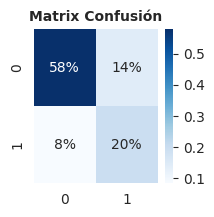

In [467]:
eval_classification(tree_7, predicciones_tree, X_train, y_train, X_test, y_test)

## **Modelos de Ensamble con Optimizacion de Hiperparámetros**
Con el objetivo de mejorar aún más el rednimiento del modelo obtenido; se aplicará un modelo de ensamble con varios decision trees mediante Random Forest.

Se aplicará Grid Search para detectar hiperparámetros óptimos, a traves de la métrica f1-score.

In [468]:
# importacion del modelo
from sklearn.ensemble import RandomForestClassifier

In [469]:
# seleccion de parámetros
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_depth = range(3,9,2)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

In [470]:
# diccionario de parámetros
rf_parametros = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}

In [471]:
# modelo Random Forest
rf = RandomForestClassifier(class_weight = "balanced")

In [472]:
# modelo con búsqueda de parámetros
rf_Grid = GridSearchCV(estimator = rf, param_grid = rf_parametros, scoring = "f1",
                       cv = stratified_kfold , verbose=2, n_jobs = 4)

In [473]:
# entrenamiento
rf_Grid.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=4,
             param_grid={'bootstrap': [True, False],
                         'max_depth': range(3, 9, 2),
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             scoring='f1', verbose=2)

In [474]:
# mejores parámetros para random forest
rf_Grid.best_params_

{'bootstrap': False,
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 10}

In [475]:
rf_best = RandomForestClassifier(bootstrap = True, max_depth = 7, min_samples_leaf = 2,
                                 min_samples_split = 2, n_estimators = 56)

In [476]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=7, min_samples_leaf=2, n_estimators=56)

In [477]:
y_pred_rf_best = rf_best.predict(X_test)

Classification Report (Test Set):
              precision    recall  f1-score   support

    Efectiva       0.80      0.94      0.87     17218
   Cancelada       0.74      0.40      0.52      6690

    accuracy                           0.79     23908
   macro avg       0.77      0.67      0.69     23908
weighted avg       0.78      0.79      0.77     23908





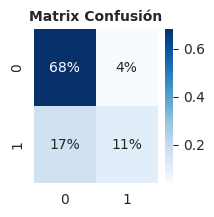

In [478]:
eval_classification(rf_best, y_pred_rf_best, X_train, y_train, X_test, y_test)

# **Conclusiones finales**

A partir del analisis de hiperparámetros y aplicación de modelos de ensamble; se concluye que el mejor modelo es un Random Forest con 56 árboles de decision.
Como acurracy general indica 80 % lo cual es una métrica adecuada. A su vez, se analizó que en un modelo que no cae en overffiting.

Si es importante recalcar que no es un modelo de presente alta precision a la hora de detectar que reservas son canceladas efectivamente; con una precision de 73 % y un recall de 44 % indica que si bien predice con un buen desempeño aquellas reservas canceladas; hay un porcentaje considerable de reservas que serán canceladas y que escapan de la dectección del modelo.
Las causas de este comportamiento son a raiz del desbalance que se posee en los datos originales.

Si bien el modelo anterior: Decision Tree (max_depth = 7) indica un f1-score más elevado; tiene un porcetaje muy alto de recall lo cual puede ser perjudicial ya que el mayor el % de falsos negativos en el modelo; es decir reservas predichas como cancelaciones que son efectivas en realidad.

Como soluciones para mejora, se plantea:
*   Aplicar al modelo existente planteado, mayor peso a la clase 1: reservas canceladas.
*   Aumentar el volumen de datos con el fin de minizar el desbalance de los mismos.